In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,linewidth=1000,suppress=True)

**Neural networks** contain one or more **hidden layer** between input and output-layers (kerros  = layer).

They can be used to classification and regression.

Nonlinear
**activation funktion** used in the hidden layers produces more complicated/efficient formulas than linear and logistic regression.

Neural networks like below are called **dense** or **fully connected**, because they have a connection from each **neuron** on the previous layer to each neuron on the next layer.

 If there are many hidden layers, then the neural network is called deep (**deep learning**).



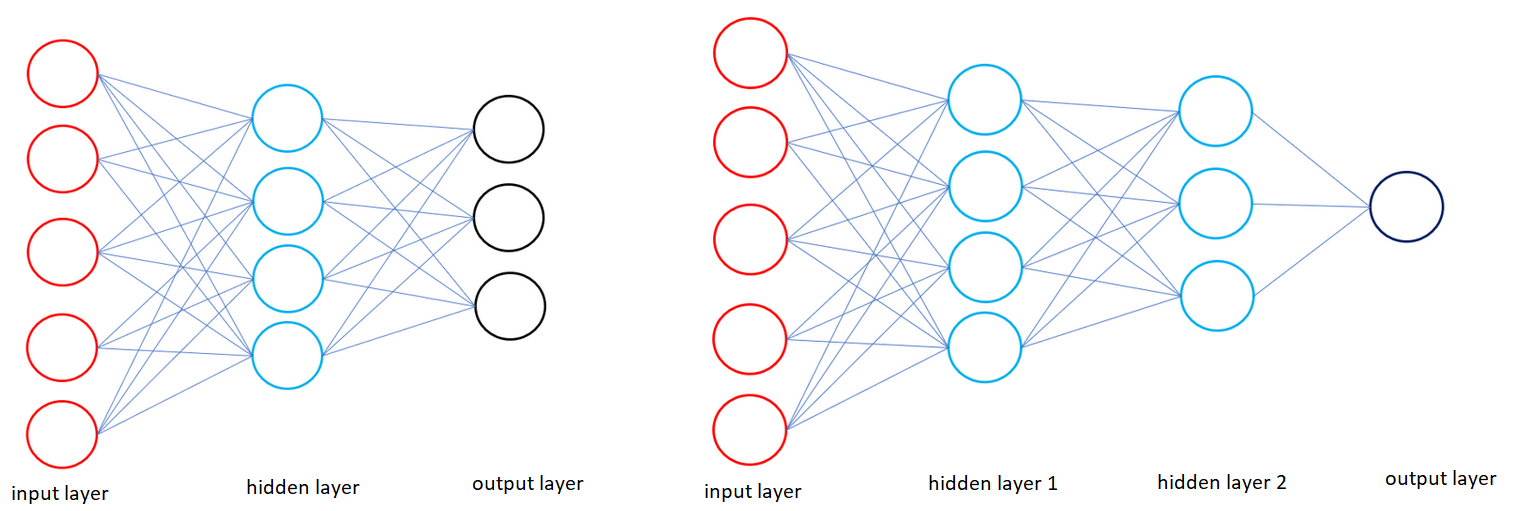


[3Blue1Brown: Neural Networks](
https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

[M. Nielsen: Neural Networks and Deep Learning](
http://neuralnetworksanddeeplearning.com/)

[DeepLearningAI: Neural Networks and Deep Learning, 25 -](
https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)

[DeepLearningAI: Hyperparameter Tuning, Regularization and Optimization](
https://www.youtube.com/watch?v=1waHlpKiNyY&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)




## **Classification, 2 variables, 2 classes**










Data: points $x^{(i)}=[x^{(i)}_1,x^{(i)}_2]$ and their classes  $y^{(i)}=0$ or $1$, $\quad i=1,2,\dots,m$

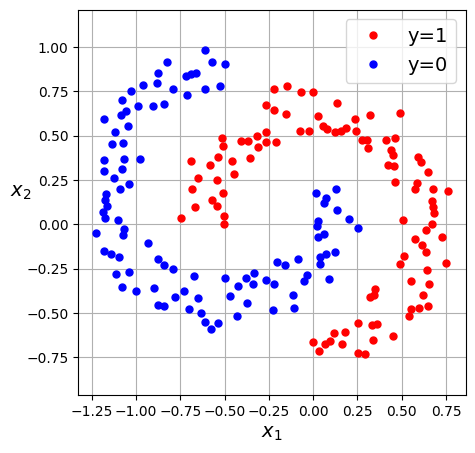

In [ ]:
n=100
m=2*n #number of datapoints
np.random.seed(0)

#class 0 points
r1=np.random.uniform(0.5,0.8,n)
th1=np.linspace(-0.5*np.pi,1.0*np.pi,n)
x1pun=r1*np.cos(th1) #pun = punainen = red
x2pun=r1*np.sin(th1)

#class 1 points
r2=np.random.uniform(0.5,0.8,n)
th2=np.linspace(-1.5*np.pi,0,n)
x1sin=r2*np.cos(th2)-0.5 #sin = sininen = blue
x2sin=r2*np.sin(th2)+0.2

#datapoints as rows of matrix x
xpun=np.vstack((x1pun,x2pun)).T
xsin=np.vstack((x1sin,x2sin)).T
x=np.vstack((xpun,xsin))

#classes in 1D-array y
ypun=np.ones(n)
ysin=np.zeros(n)
y=np.hstack((ypun,ysin))


plt.figure(figsize=(5,5))
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=5,label='y=1')
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=5,label='y=0')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()


Neural network for classification

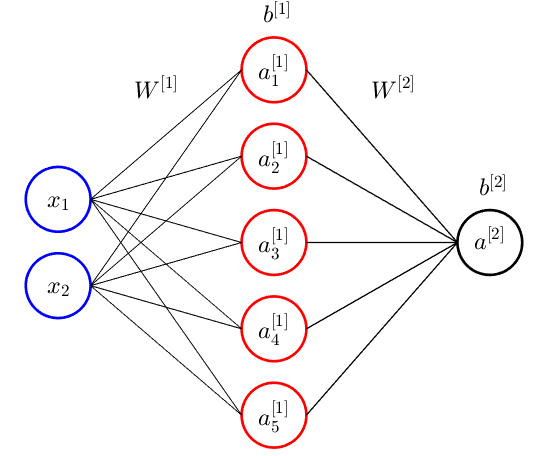

Hidden layer produces complicated enough formula to  separate the classes.




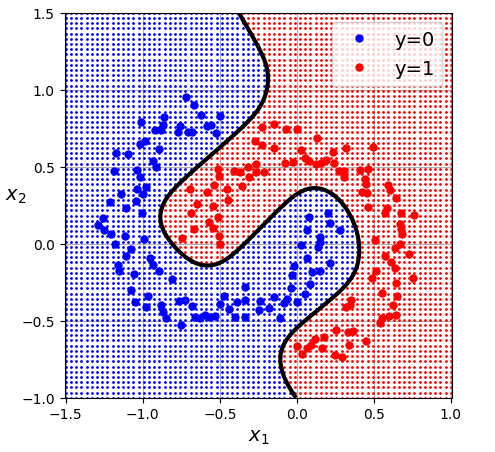

Coefficients:


$$
\begin{array}{l}
w^{[1]}_{jk}: \textrm{ input-layer } \to \textrm{ hidden layer}\\\\
w^{[2]}_{k1}: \textrm{ hidden layer }\to \textrm{ output-layer}\\\\
b^{[1]}_k: \textrm{ biases in hidden layer }\\\\
b^{[2]}: \textrm{ bias in output-layer}
\end{array}
$$



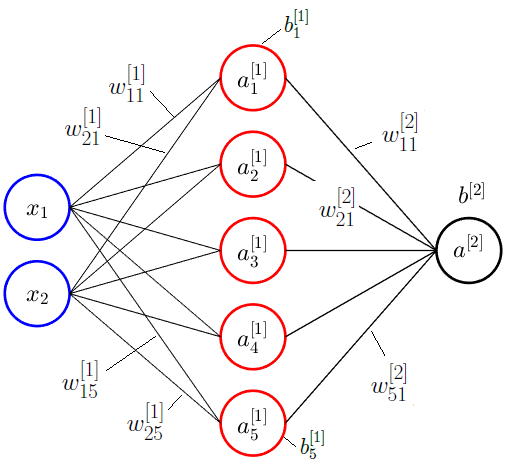

Classification of point
$
x=[
x_1,
x_2
]$
:

calculate the "activations" of hidden- and output-layers


$$\left\{
\begin{array}{l}
z^{[1]}_1=w^{[1]}_{11}x_1+w^{[1]}_{21}x_2+b^{[1]}_1,\quad a^{[1]}_1=g(z^{[1]}_1)\\\\
z^{[1]}_2=w^{[1]}_{12}x_1+w^{[1]}_{22}x_2+b^{[1]}_2,\quad a^{[1]}_2=g(z^{[1]}_2)\\\\
z^{[1]}_3=w^{[1]}_{13}x_1+w^{[1]}_{23}x_2+b^{[1]}_3,\quad a^{[1]}_3=g(z^{[1]}_3)\\\\
z^{[1]}_4=w^{[1]}_{14}x_1+w^{[1]}_{24}x_2+b^{[1]}_4,\quad a^{[1]}_4=g(z^{[1]}_4)\\\\
z^{[1]}_5=w^{[1]}_{15}x_1+w^{[1]}_{25}x_2+b^{[1]}_5,\quad a^{[1]}_5=g(z^{[1]}_5)
\end{array}
\right.
$$









$$
\begin{array}{l}
z^{[2]}=w^{[2]}_{11}a^{[1]}_1+w^{[2]}_{21}a^{[1]}_2+\dots+w^{[2]}_{51}a^{[1]}_5+b^{[2]}\\\\
 a^{[2]}=\sigma(z^{[2]})\\\\
\end{array}
$$

where $g(z)$ is the **activation function** of the hidden layer and

$$
\begin{array}{l}\\
\end{array}
$$


$$
\sigma(z)=\frac{1}{1+\exp(-z)}
$$ is sigmoid.

Point $x$ belongs to



class $y=1,\textrm{ if }z^{[2]}>0$ i.e $a^{[2]}>0.5$



class $y=0,\textrm{ if }z^{[2]}<0$ i.e $a^{[2]}<0.5$


$$
\begin{array}{l}
\\\\
\end{array}
$$

Interpretation: $x$ belongs to



class $y=1$ with probability  $a^{[2]}$



class $y=0$
with probability  $1-a^{[2]}$


Common activation functions:



Sigmoid

$$
g(z)=\frac{1}{1+\exp(-z)}
$$

$$\begin{array}{l}\\
\end{array}$$

Hyperbolic tangent

$$
g(z) = \tanh(z) = \frac{\exp(z)-\exp(-z)}{\exp(z)+\exp(-z)}
$$

$$\begin{array}{l}\\
\end{array}$$

Rectified Linear Unit (ReLU):

$$
g(z)=\max(z,0)=\left\{\begin{array}{l}z,\,\textrm{ if } z> 0\\
0,\,\textrm{ if } z\le  0\\\end{array}\right.
$$



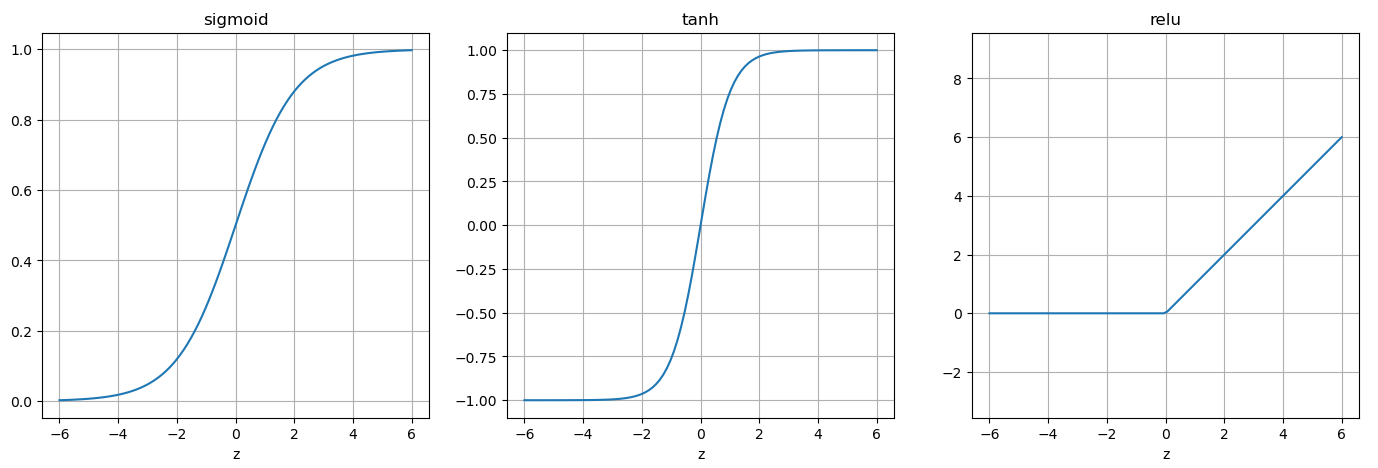

With matrices ($\textrm{@}$ is matrix multiplication):

$$\begin{array}{l}
x=[x_1,x_2],\quad
W^{[1]}=\left[\begin{array}{ccccc}
w^{[1]}_{11}&w^{[1]}_{12}&w^{[1]}_{13}&w^{[1]}_{14}&w^{[1]}_{15}\\
w^{[1]}_{21}&w^{[1]}_{22}&w^{[1]}_{23}&w^{[1]}_{24}&w^{[1]}_{25}\\
\end{array}
\right]
,\quad
 b^{[1]}=\left[
b^{[1]}_1,\,b^{[1]}_2,\,b^{[1]}_3,\,b^{[1]}_4,\,b^{[1]}_5
\right],\quad W^{[2]}=\left[\begin{array}{c}w^{[2]}_{11}\\w^{[2]}_{21}\\w^{[2]}_{31}\\w^{[2]}_{41}\\w^{[2]}_{51}\end{array}\right],\quad b^{[2]}=[b^{[2]}]\\\\
z^{[1]}=[z^{[1]}_1,z^{[1]}_2,z^{[1]}_3,z^{[1]}_4,z^{[1]}_5]=
x@W^{[1]}+b^{[1]}%W^{1}_{j,1}\cdot x_1+W^{1}_{j,2}\cdot x_2+b^1_j,\quad
,\quad a^{[1]}=
[a^{[1]}_1,a^{[1]}_2,a^{[1]}_3,a^{[1]}_4,a^{[1]}_5]=
g(z^{[1]})
\\\\
z^{[2]}=a^{[1]}@W^{[2]}+b^{[2]},\quad  a^{[2]}=\sigma(z^{[2]})
\end{array}
$$

The coefficients are found by minimizing the cost function

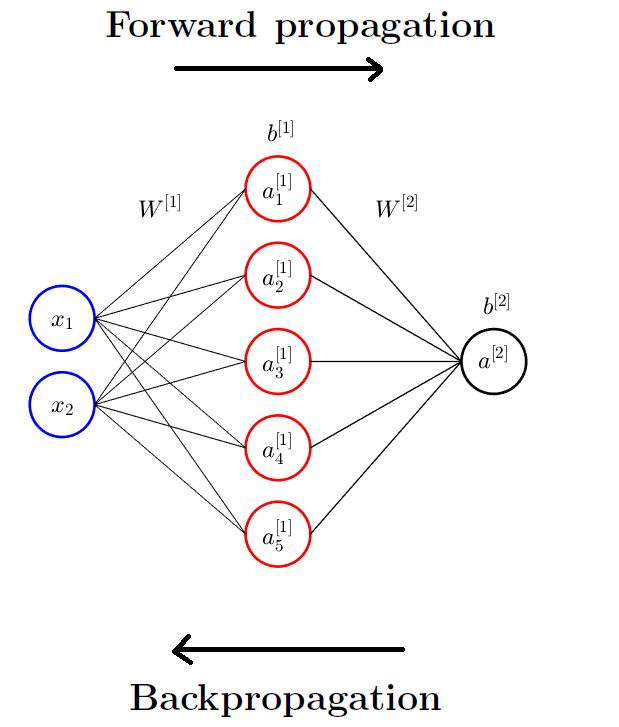

Initialize the coefficients $W^{[1]},b^{[1]},W^{[2]},b^{[2]}$

$$
\begin{array}{l}\\
\end{array}
$$

**Forward propagation:**
calculate the activations for each datapoint $
x^{(i)}=
[
x_1^{(i)},
x_2^{(i)}
]$

$\begin{array}{l}\\z^{[1](i)}=x^{(i)}@W^{[1]} +b^{[1]},\quad a^{[1](i)}=g(z^{[1](i)})\\\\
 z^{[2](i)}=a^{[1](i)}@W^{[2]} +b^{[2]},
\quad a^{[2](i)}=\sigma(z^{[2](i)})\\\\
\end{array}$


Cost-function (binary cross entropy)

$$
C=\displaystyle{\,\frac{1}{m}\,\sum_{i=1}^m C^{(i)}}$$

where

$$ C^{(i)}=  \left\{\begin{array}{l}
-\log(a^{[2](i)}), \, \textrm{ if }y^{(i)}=1\\\\
-\log(1-a^{[2](i)}), \,\textrm{ if }y^{(i)}=0
\end{array}
\right.
$$

$$
\begin{array}{l}\\\end{array}
$$

**Backpropagation:**
calculate the partial derivatives of $C$


$$\begin{array}{l}
\\
\displaystyle{\frac{\partial C}{\partial b^{[2]}}=\frac{1}{m}}\,\sum_{i=1}^m (a^{[2](i)}-y^{(i)})
\\\\
\displaystyle{\frac{\partial C}{\partial w^{[2]}_{k1}}
=\frac{1}{m}}\,\sum_{i=1}^m(a^{[2](i)}-y^{(i)})a^{[1](i)}_k
\\\\
\displaystyle{\frac{\partial C}{\partial b^{[1]}_k}=\frac{1}{m}\,\sum_{i=1}^m w^{[2]}_{k1}(a^{[2](i)}-y^{(i)})g^\prime (z_k^{[1](i)})}
\\\\
\displaystyle{\frac{\partial C}{\partial w^{[1]}_{jk}}=\frac{1}{m}}\,\sum_{i=1}^m w^{[2]}_{k1}(a^{[2](i)}-y^{(i)})g^\prime(z_k^{[1](i)})x^{(i)}_j\\\\ j=1,2,\,k=1,2,...,5\\\\\\
\end{array}$$

and update (gradient descent):

$$\begin{array}{l}
b^{[2]}=b^{[2]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[2]}}}
\\\\
w^{[2]}_{k1}=w^{[2]}_{k1}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial w^{[2]}_{k1}}}
 \\\\
b^{[1]}_k=b^{[1]}_k-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[1]}_k}}
\\\\
w^{[1]}_{jk}=w^{[1]}_{jk}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial w^{[1]}_{jk}}}
\\\\
j=1,2,\,k=1,2,\dots,5\\\\
\end{array}$$

where $\alpha>0$ is the learning rate


**Note:** $g^\prime(z)$ is the derivative of the activation function $g(z)$

Sigmoid

$$
g(z)=\frac{1}{1+\exp(-z)}\quad \to \quad g^\prime(z)=\frac{\exp(-z)}{(1+\exp(-z))^2}
$$

Tanh

$$
g(z)=\frac{\exp(z)-\exp(-z)}{\exp(z)+\exp(-z)}\quad \to \quad g^\prime(z)=1-\tanh(z)^2
$$

ReLU

$$
g(z)=\max(z,0)=\left\{\begin{array}{l}z,\,\textrm{ if } z> 0\\
0,\,\textrm{ if } z\le  0\\\end{array}\right.
\quad \to \quad g^\prime(z)=
\left\{\begin{array}{l}1,\,\textrm{ if } z> 0\\
0,\,\textrm{ if } z\le  0\\\end{array}\right.
$$




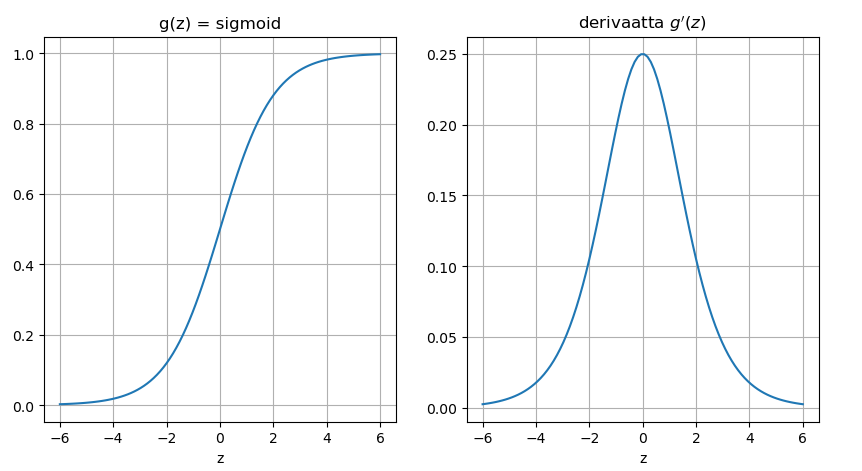

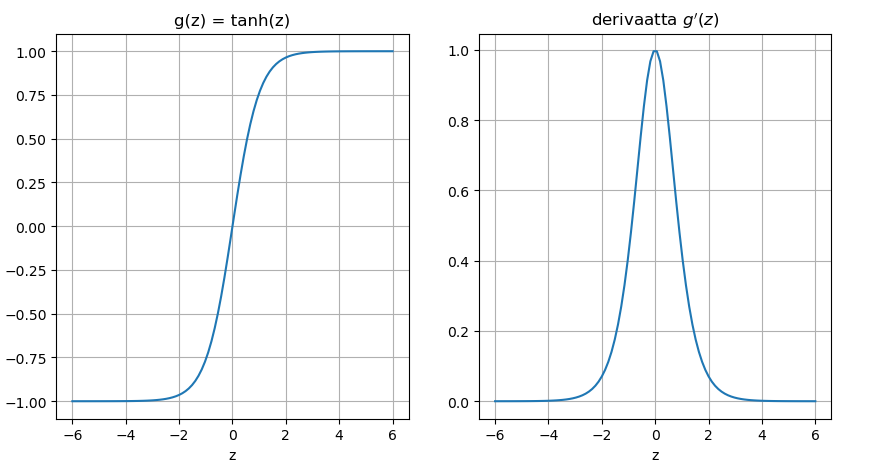

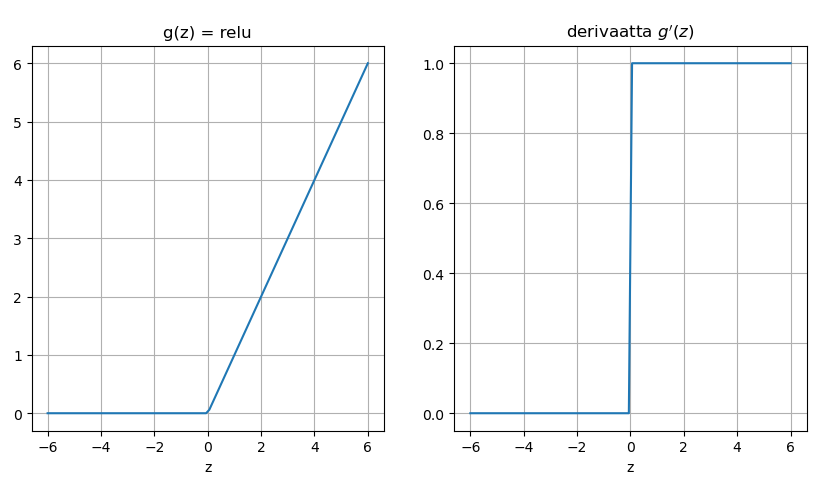

With matrices: ($@$ is matrix multiplication and $\ast$ elementwise multiplication)

Datapoints as rows of matrix $x$ and their classes in column vector $y$

$$
x=\left[
\begin{array}{cc}
x^{(1)}_1&x^{(1)}_2\\
x^{(2)}_1&x^{(2)}_2\\
\vdots&\vdots\\
x^{(m)}_1&x^{(m)}_2
\end{array}
\right], \quad y=\left[\begin{array}{c}y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}\end{array}\right]
$$

Forward propagation:

$$\begin{array}{l}
z^{[1]}=x@W_1+b^{[1]},\quad a^{[1]}=
g(z^{[1]})
\quad (m\times 5)\\\\
z^{[2]}=a^{[1]}@W_2+b^{[2]},
\quad
 a^{[2]}=
\sigma(z^{[2]})
\quad (m\times 1)\\\\
Ci=-y\ast \log(a^{[2]})-(1-y)\ast \log(1-a^{[2]})\quad (m\times 1)\\\\
\displaystyle{C=\frac{1}{m}\sum_{i=1}^m (Ci)_i}\\\\\end{array}$$





Backpropagation:

$$\begin{array}{l}
\delta_2=a^{[2]}-y\quad (m\times 1)\\\\
\displaystyle{\frac{\partial C}{\partial b^{[2]}}=\frac{1}{m}\sum_{i=1}^m\delta_{2i}}\\\\
\displaystyle{\frac{\partial C}{\partial W^{[2]}}=\frac{1}{m} \,(a^{[1]})^T@ \delta_2} \quad (5\times 1)\\\\
\delta_1=\delta_2@(W^{[2]})^T\ast g^\prime(z^{[1]})\quad (m\times 5)\\\\
\displaystyle{\frac{\partial C}{\partial b^{[1]}_j}}=\frac{1}{m}\sum_{i=1}^m(\delta_1)_{ij},\quad j=1,2,\dots,5\\\\
\displaystyle{\frac{\partial C}{\partial W^{[1]}}=\frac{1}{m} \,x^T@ \delta_1}\quad (2\times 5)\\\\\end{array}$$

Update:

$$\begin{array}{l}
b^{[2]}=b^{[2]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[2]}}}
\\\\
W^{[2]}=W^{[2]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial W^{[2]}}}
 \\\\
b^{[1]}=b^{[1]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[1]}}}
\\\\
W^{[1]}=W^{[1]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial W^{[1]}}}
\\\\
\end{array}$$



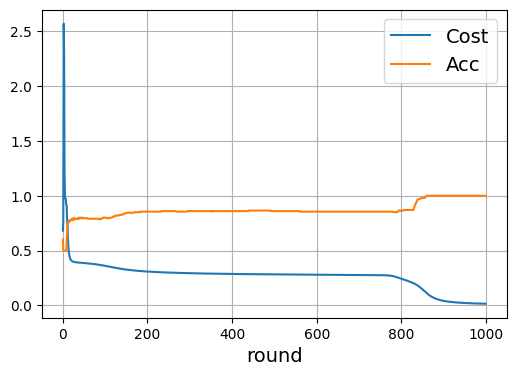

In [ ]:
#Initialization
W1=1*np.random.randn(2,5)
b1=0*np.random.randn(1,5)
W2=1*np.random.randn(5,1)
b2=0*np.random.randn(1,1)

#learning rate
alfa=10 #sigmoid
#alfa=1 #ReLU

Y=y.reshape((m,1)) #y to a column vector

N=1000 #number of updates

Cost=np.zeros(N) #costs
Accuracy=np.zeros(N) #the fraction of datapoints classified correctly

for k in range(N):
  #forward propagation
  z1=x@W1+b1
  #activation g(z1)
  a1=1/(1+np.exp(-z1)) #sigmoid
  #a1=np.maximum(z1,0) #ReLU

  z2=a1@W2+b2
  a2=1/(1+np.exp(-z2))

  Ci=-Y*np.log(a2+1e-10)-(1-Y)*np.log(1-a2+1e-10)
  Cost[k]=1/m*np.sum(Ci)

  #predicted classes of datapoints
  ypred=np.zeros(m)
  ypred[a2[:,0]>=0.5]=1
  #fraction of datapoints correctly classified
  Accuracy[k]=len(y[y==ypred])/m

  #backpropagation
  #partial derivatives
  d2=a2-Y
  dCb2=1/m*np.sum(d2)
  dCW2=1/m*a1.T@d2
  #g'(z1), sigmoid
  dgz1=np.exp(-z1)/(1+np.exp(-z1))**2
  #g'(z1), ReLU
  #dgz1=np.zeros((m,5))
  #dgz1[z1>0]=1
  d1=d2@W2.T*dgz1
  dCb1=1/m*np.sum(d1,axis=0,keepdims=True)
  dCW1=1/m*x.T@d1
  #updates
  b1=b1-alfa*dCb1
  W1=W1-alfa*dCW1
  b2=b2-alfa*dCb2
  W2=W2-alfa*dCW2

plt.figure(figsize=(6,4))
plt.plot(Cost,label='Cost')
plt.plot(Accuracy,label='Acc')
plt.grid()
plt.xlabel('round',fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
#last coefficients
print(W1,'\n')
print(b1,'\n')
print(W2,'\n')
print(b2,'\n')
#last cost
print(Cost[N-1])

[[ 11.863  -7.425 -10.201 -10.165  -5.89 ]
 [  6.958   7.248  11.728  -8.047   7.401]] 

[[ -5.308  -2.287 -12.755  -8.564   3.676]] 

[[  9.412]
 [ 10.226]
 [-10.744]
 [-10.016]
 [ -9.796]] 

[[4.621]] 

0.015006548971401214


In [ ]:
#test point
xt=np.array([[-0.5,-0.2]])
z1t=xt@W1+b1
a1t=1/(1+np.exp(-z1t))#sigmoid
#a1t=np.maximum(z1t,0) #ReLU
z2t=a1t@W2+b2
a2t=1/(1+np.exp(-z2t))
print(z2t,'\n')
print(a2t)

[[-1.403]] 

[[0.197]]


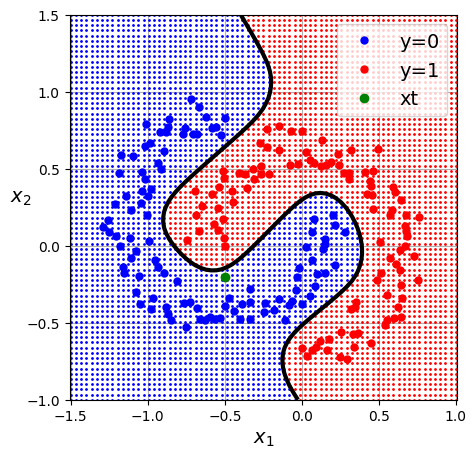

In [ ]:
#resulting classification
M=75
x1=np.linspace(-1.5,1,M)
x2=np.linspace(-1,1.5,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))
zz1=xx@W1+b1
aa1=1/(1+np.exp(-zz1))#sigmoid
#aa1=np.maximum(zz1,0)#relu
zz2=aa1@W2+b2

ZZ2=zz2.reshape((M,M))

plt.figure(figsize=(5,5))
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=5,label='y=0')
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=5,label='y=1')
plt.plot(x1[zz2>0],x2[zz2>0],'r.',markersize=2)
plt.plot(x1[zz2<=0],x2[zz2<=0],'b.',markersize=2)
plt.contour(X1,X2,ZZ2,levels=[0.0],colors=['k'],linewidths=[3])
plt.plot(xt[0,0],xt[0,1],'go',label='xt')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

**Note:** If the hidden layer didn't have the activation function, then

$$
\begin{array}{rcl}
x&=&[x_1,x_2]\\\\
z^{[1]}&=&x@W^{[1]}+b^{[1]}\\\\
a^{[1]}&=&z^{[1]} \quad (\textrm{not }g(z^{[1]}))\\\\
z^{[2]}&=&a^{[1]}@W^{[2]} +b^{[2]}\\\\
&=& (x@W^{[1]} +b^{[1]})@W^{[2]}+b^{[2]}\\\\
&=&x@\underbrace{W^{[1]}@ W^{[2]}}_{W} +\underbrace{b^{[1]}@W^{[2]} +b^{[2]}}_{b}\\\\
&=&x@W  +b\\\\
&=&w_1x_1+w_2x_2+b
\end{array}
$$

where

$$
W=W^{[1]}@ W^{[2]}
=\left[\begin{array}{c}w_1\\w_2\end{array}\right]\quad \textrm{and}\quad   b=b^{[1]}@ W^{[2]}+b^{[2]}$$

$$\begin{array}{l}\\\end{array}$$

i.e the neural network would be just a logistic regression with coefficients
$w_1,w_2$ and $b$




**Stochastic gradient descent (SGD)**



Minimimization with gradient descent is often slow and requires a lot of calculations, because the calculation of partial derivates involves all datapoints. Stochastic gradient descent uses only a fraction of datapoints to calculate the partials:



Calculate the partials using only **batch** size datapoints at a time, and update the coefficents.

When all datapoints have appeared in a batch,  an **epoch** is completed.

The smaller the batch size, the faster the coefficients are updated, but the update directions are only approximations to the steepest downhill and the updates don't always decrease the cost.  


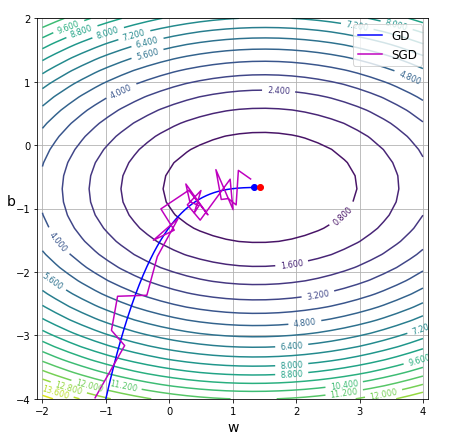

Another problem in the minimizion is that the "graph" of the cost function usually looks like the one below i.e it contains
several "valleys" and the minimization doesn't always find the lowest one but get stuck to a higher valley.   

One way to try to avoid this risk is to try many different initial values for the coefficients.

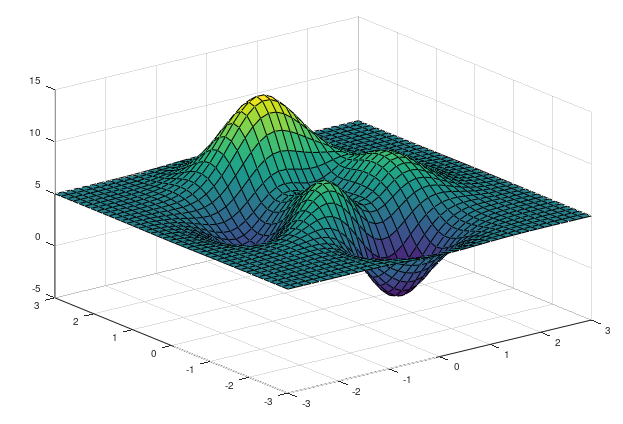

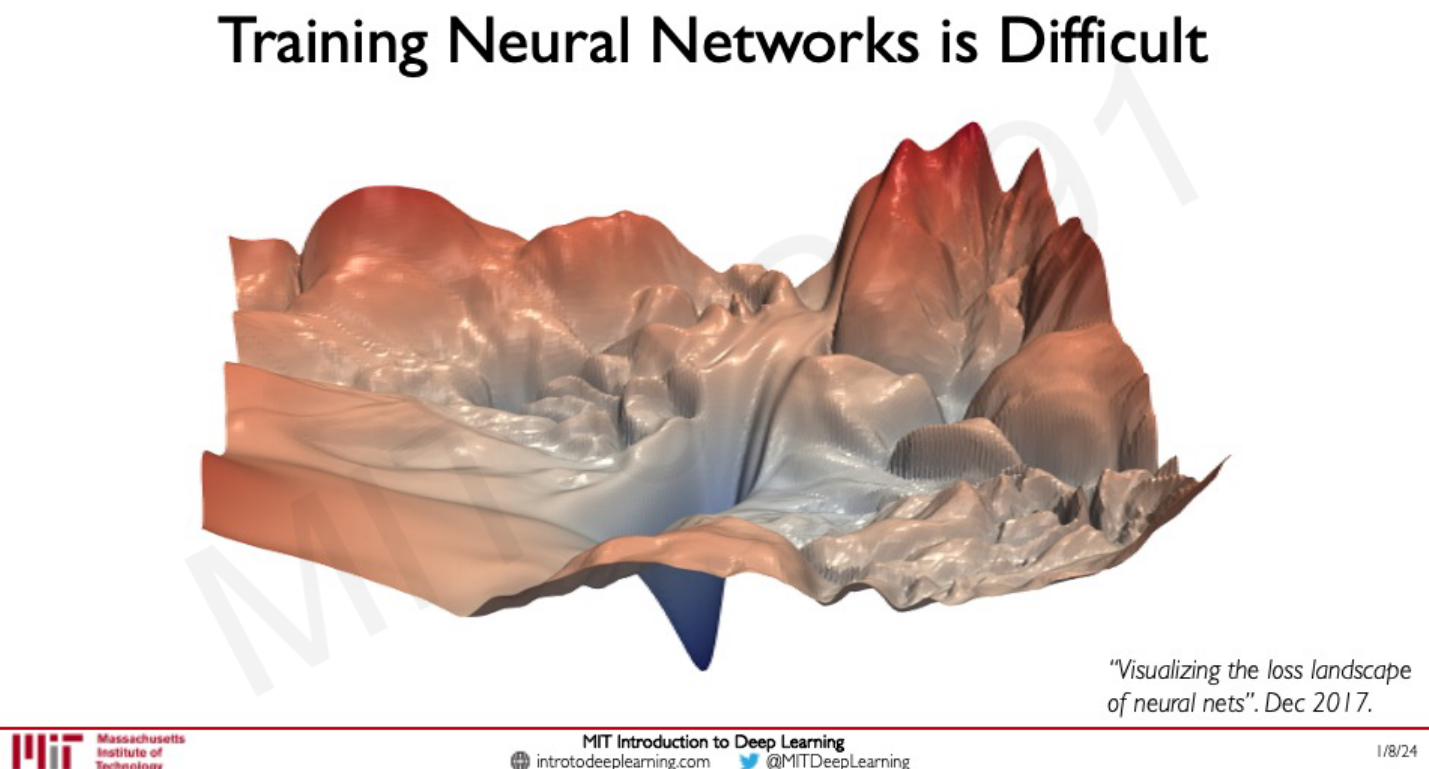

Neural networks can be build and trained using [TensorFlow](https://www.tensorflow.org/) and [Keras](https://keras.io/).






In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dense


model=Sequential()
model.add(Input(shape=(2,))) #input-layer
model.add(Dense(5, activation='sigmoid')) #hidden layer
#model.add(Dense(5, activation='tanh')) #hidden layer
#model.add(Dense(5, activation='relu')) #hidden layer
model.add(Dense(1, activation='sigmoid')) #output-layer

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

Activation functions available in Keras:
https://keras.io/api/layers/activations/


Coefficient initialization methods available in Keras:
https://keras.io/api/layers/initializers/

(defaults are 'glorot_uniform' and 'zeros':
https://keras.io/api/layers/core_layers/dense/)

In [ ]:
#optimization strategy
#SGD=stochastic gradient descent
from keras.api.optimizers import SGD

#choose cost function (loss) and keep track also on accuracy of the classification (metrics)

model.compile(optimizer=SGD(learning_rate=10.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the network i.e minimize the cost
#datapoints as rows of 2D-matrix x and
#their classes 0/1 in 1D-array y

history=model.fit(x,y,batch_size=200,epochs=1000,verbose=1)

#verbose=0, if you don't want to see the prints below during the training

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7177
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5000 - loss: 1.2510
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5000 - loss: 3.4387
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5000 - loss: 1.2558
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5000 - loss: 1.0709
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5000 - loss: 1.0517
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: 1.0588
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 1.0286
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 1.0569
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 1.0033
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5000 - loss: 1.0873
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accur

**Note:** if model.fit is run again, updates start from the last coefficients of the previous run.

Also, if for example the learning rate is changed by running the model.compile, updates start from the last coefficients of the previous run.

If model is changed, then coefficients are initialized randomly.

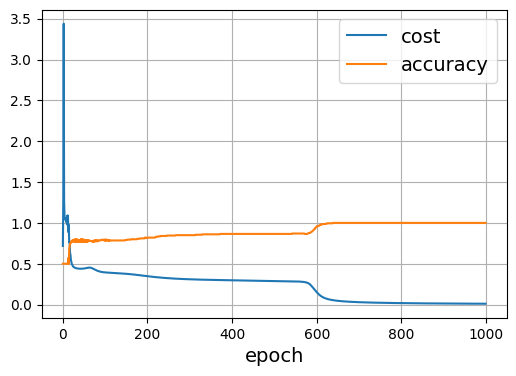

In [ ]:
#graphs of cost and accuracy during the training

cost = history.history['loss']
accuracy = history.history['accuracy']

plt.figure(figsize=(6,4))
plt.plot(cost,label='cost')
plt.plot(accuracy,label='accuracy')
plt.grid()
plt.xlabel('epoch',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

In [ ]:
#last coefficients
weights = model.get_weights()

w1=weights[0]
b1=weights[1]
w2=weights[2]
b2=weights[3]


In [ ]:
np.set_printoptions(precision=4)
print(w1,'\n')
print(b1,'\n')
print(w2,'\n')
print(b2)

[[ 14.0712   5.4836  -7.6278  -7.0037 -10.452 ]
 [ -7.5959 -11.3635  -4.6492  -4.4896  10.4926]] 

[ -4.3138   1.8183  -6.9663  -6.5901 -11.9837] 

[[ 14.0576]
 [-13.7517]
 [ -6.808 ]
 [ -5.3136]
 [-12.17  ]] 

[6.2738]


In [ ]:
#test point
xt=np.array([[0.1,-0.4]]) #(1,2)-matrix
a2t=model.predict(xt) #probability to belong to class 1
print(a2t)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.4964]]


In [ ]:
#with matrices
z1=xt@w1+b1
a1=1/(1+np.exp(-z1))
z2=a1@w2+b2
a2=1/(1+np.exp(-z2))
print(a2)

[[0.4964]]


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


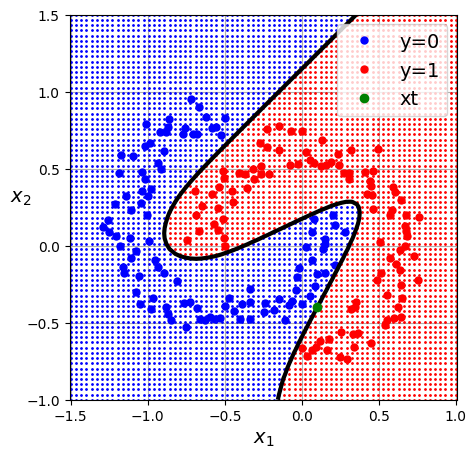

In [ ]:
#resulting classification
M=75
x1=np.linspace(-1.5,1,M)
x2=np.linspace(-1,1.5,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))
aa2=model.predict(xx)
AA2=aa2.reshape((M,M))

plt.figure(figsize=(5,5))
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=5,label='y=0')
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=5,label='y=1')
plt.plot(x1[aa2>0.5],x2[aa2>0.5],'r.',markersize=2)
plt.plot(x1[aa2<=0.5],x2[aa2<=0.5],'b.',markersize=2)
plt.contour(X1,X2,AA2,levels=[0.5],colors=['k'],linewidths=[3])
plt.plot(xt[0,0],xt[0,1],'go',label='xt')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

## **Classification, 2 variables, 3 classes**



Data: points $x^{(i)}=[x^{(i)}_1,x^{(i)}_2]$ and their classes $y^{(i)}=1,2,3$, $\quad i=1,2,\dots,m$

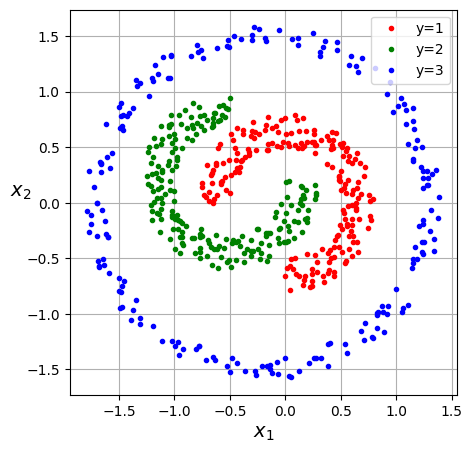

In [ ]:
n=200
m=3*n

#class y=1 points
r1=np.random.uniform(0.5,0.8,n)
th1=-np.pi/2+np.linspace(0,1.5*np.pi,n)
th1=np.linspace(-0.5*np.pi,1.0*np.pi,n)
x1pun=r1*np.cos(th1)
x2pun=r1*np.sin(th1)

#class y=2 points
r2=np.random.uniform(0.5,0.8,n)
th2=np.linspace(-1.5*np.pi,0,n)
x1vih=r2*np.cos(th2)-0.5
x2vih=r2*np.sin(th2)+0.2

#class y=3 points
r3=np.random.uniform(1.4,1.6,n)
th3=np.random.uniform(0,2*np.pi,n)
x1sin=r3*np.cos(th3)-0.2
x2sin=r3*np.sin(th3)

#datapoints as rows of matrix x
x1=np.hstack((x1pun,x1vih,x1sin))
x2=np.hstack((x2pun,x2vih,x2sin))
x=np.vstack((x1,x2)).T

#classes in 1D-array y
y1=np.ones(n)
y2=2*np.ones(n)
y3=3*np.ones(n)
y=np.hstack((y1,y2,y3))



plt.figure(figsize=(5,5))
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=3,label='y=1')
plt.plot(x[y==2,0],x[y==2,1],'go',markersize=3,label='y=2')
plt.plot(x[y==3,0],x[y==3,1],'bo',markersize=3,label='y=3')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=10,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()


Neural network for classification






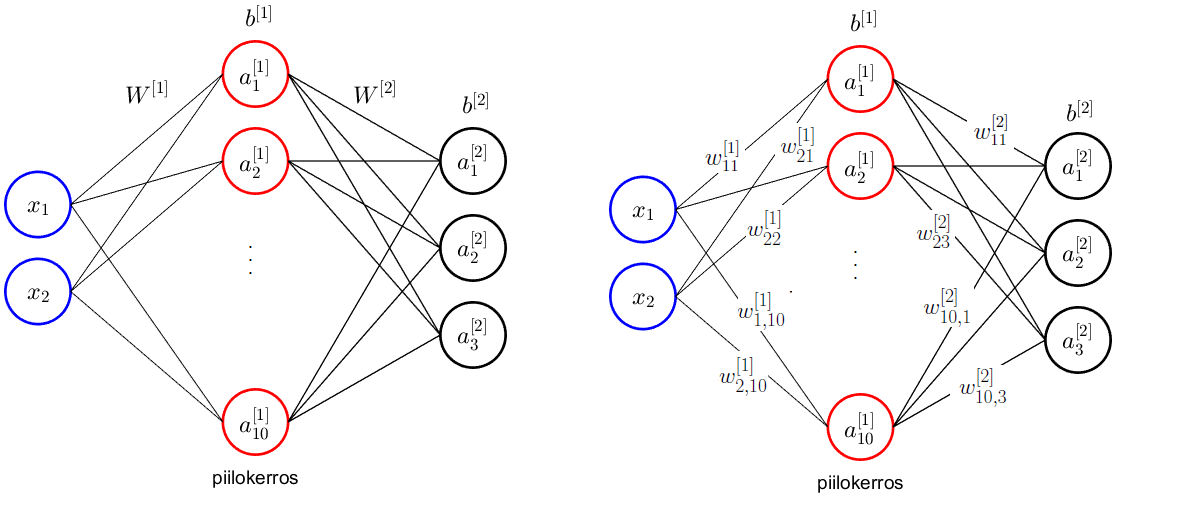

Coefficients:

$$
W^{[1]}=\left[\begin{array}{cccc}
w^{[1]}_{11}&w^{[1]}_{12}&\dots&w^{[1]}_{1,10}\\
w^{[1]}_{21}&w^{[1]}_{22}&\dots&w^{[1]}_{2,10}
\end{array}
\right],\quad
b^{[1]}=\left[
b^{[1]}_1,\,b^{[1]}_2,\,\dots,\,b^{[1]}_{10}
\right],\quad
 W^{[2]}=\left[\begin{array}{ccc}
w^{[2]}_{11}&w^{[2]}_{12}&w^{[2]}_{13}\\
w^{[2]}_{21}&w^{[2]}_{22}&w^{[2]}_{23}\\
\vdots&\vdots&\vdots\\
w^{[2]}_{10,1}&w^{[2]}_{10,2}&w^{[2]}_{10,3}\\
\end{array}\right],\quad
 b^{[2]}=\left[
b^{[2]}_1,\,b^{[2]}_2,\,b^{[2]}_3
\right]
$$

Classification of point
$
x=\left[
x_1,
x_2
\right]$
: calculate

$$
\begin{array}{l}
\\
\end{array}
$$


$$
z^{[1]}=[z^{[1]}_1,z^{[1]}_2,...,z^{[1]}_{10}]=
x@W^{[1]}+b^{[1]}%W^{1}_{j,1}\cdot x_1+W^{1}_{j,2}\cdot x_2+b^1_j
,\quad
a^{[1]}=g(z^{[1]})
$$

$$
\begin{array}{l}
\\
\end{array}
$$

where
$
g(z)
$
is activation function,

$$
\begin{array}{l}
\\
\end{array}
$$



$$
z^{[2]}=[z^{[2]}_1,z^{[2]}_2,z^{[2]}_3]=a^{[1]}@W^{[2]} +b^{[2]},\quad
a^{[2]}=[a^{[2]}_1,a^{[2]}_2,a^{[2]}_3]=s(z^{[2]})
$$


$$
\begin{array}{l}
\\
\end{array}
$$


where
 $s(z)$ is softmax, i.e


$$
\begin{array}{l}
\\
\end{array}
$$


$$
a^{[2]}_k=\frac{\exp(z^{[2]}_k)}{\exp(z^{[2]}_1)+\exp(z^{[2]}_2)+\exp(z^{[2]}_3)},\quad k=1,2,3
$$


$$
\begin{array}{l}
\\
\end{array}
$$

Point $x$ belongs to class $1,2$ tai $3$ according to which of the numbers $z^{[2]}_1,z^{[2]}_2,z^{[2]}_3$ is largest.

$$
\begin{array}{l}
\\
\end{array}
$$



Interpretation:  $x$ belongs to class $k=1,2,3$ with probability
$
a^{[2]}_k
$



Coefficients are found by minimizing cost function
(categorical cross entropy):

$$
C=\frac{1}{m} \,\sum_{i=1}^m C^{(i)}$$


where

$$C^{(i)}=-\log(a_k^{[2](i)}),\textrm{ when } y^{(i)}=k
$$

$$
\begin{array}{l}\end{array}
$$












In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dense


model=Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.api.optimizers import SGD


model.compile(optimizer=SGD(learning_rate=2.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#sparse = classes 0,1,2
#one-hot-encoding: 1=[1,0,0], 2 = [0,1,0], 3 = [0,0,1]  -> categorical_crossentropy


In [ ]:
#y-1 = classes 0,1,2
history=model.fit(x,y-1,batch_size=20,epochs=200)

Epoch 1/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.4083
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.4183
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9865 - accuracy: 0.4633
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.5950
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6950
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8150
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8550
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8617
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8567
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8667
Epoch 11/

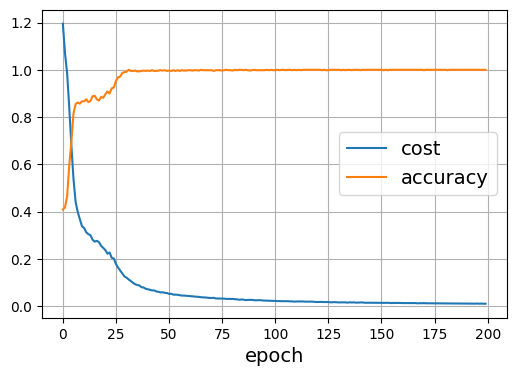

In [ ]:
#cost and accuracy during training
cost = history.history['loss']
accuracy = history.history['accuracy']

plt.figure(figsize=(6,4))
plt.plot(cost,label='cost')
plt.plot(accuracy,label='accuracy')
plt.grid()
plt.xlabel('epoch',fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
#last weights
weights = model.get_weights()
w1=weights[0]
b1=weights[1]
w2=weights[2]
b2=weights[3]

In [ ]:
np.set_printoptions(precision=3,linewidth=100)
w1

array([[-9.420e+00, -5.797e+00,  2.837e+00, -3.368e+00,  9.544e+00,  5.717e+00,  2.579e+00,
        -6.194e+00, -6.348e-01,  7.699e-03],
       [ 7.065e-01,  1.082e+01, -6.764e+00,  4.920e-01, -7.893e+00,  7.449e+00, -2.356e-01,
        -2.565e+00,  9.967e+00,  4.449e-01]], dtype=float32)

In [ ]:
#test point
xt=np.array([[0.0,0.5]])
at=model.predict(xt)[0,:] #a1,a2,a3
print(at)
yt_pred=np.argmax(at) #predicted class
print(yt_pred)

1/1 [==============================] - 0s 51ms/step
[9.999e-01 1.335e-04 8.221e-11]
0


In [ ]:
#with matrices
z1=xt@w1+b1
a1=1/(1+np.exp(-z1))
z2=a1@w2+b2
a2=np.exp(z2)/np.sum(np.exp(z2))
a2

array([[9.999e-01, 1.335e-04, 8.221e-11]])

176/176 [==============================] - 0s 1ms/step


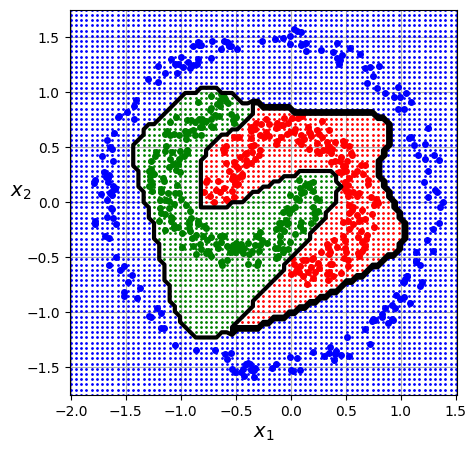

In [ ]:
#resulting classification
M=75
x1=np.linspace(-2,1.5,M)
x2=np.linspace(-1.75,1.75,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))

zz=model.predict(xx)
zz2=np.argmax(zz,axis=1)
ZZ2=zz2.reshape((M,M))

plt.figure(figsize=(5,5))
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=4,label='y=1')
plt.plot(x[y==2,0],x[y==2,1],'go',markersize=4,label='y=2')
plt.plot(x[y==3,0],x[y==3,1],'bo',markersize=4,label='y=3')
plt.plot(x1[zz2==0,0],x2[zz2==0,0],'r.',markersize=2)
plt.plot(x1[zz2==1,0],x2[zz2==1,0],'g.',markersize=2)
plt.plot(x1[zz2==2,0],x2[zz2==2,0],'b.',markersize=2)
plt.contour(X1,X2,ZZ2,levels=[0,1,2],colors=['k'],linewidths=[3])
plt.axis('equal')
plt.grid()
#plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

##**Overfitting and regularization**







Neural networks contain so many coefficients that they might produce  too complicated formulas i.e the formula is fitted too precisely to the **training data** used to find the coefficients (**overfitting**), and it doesn't generalize i.e it  gives worse results to new datapoints.  
  
  


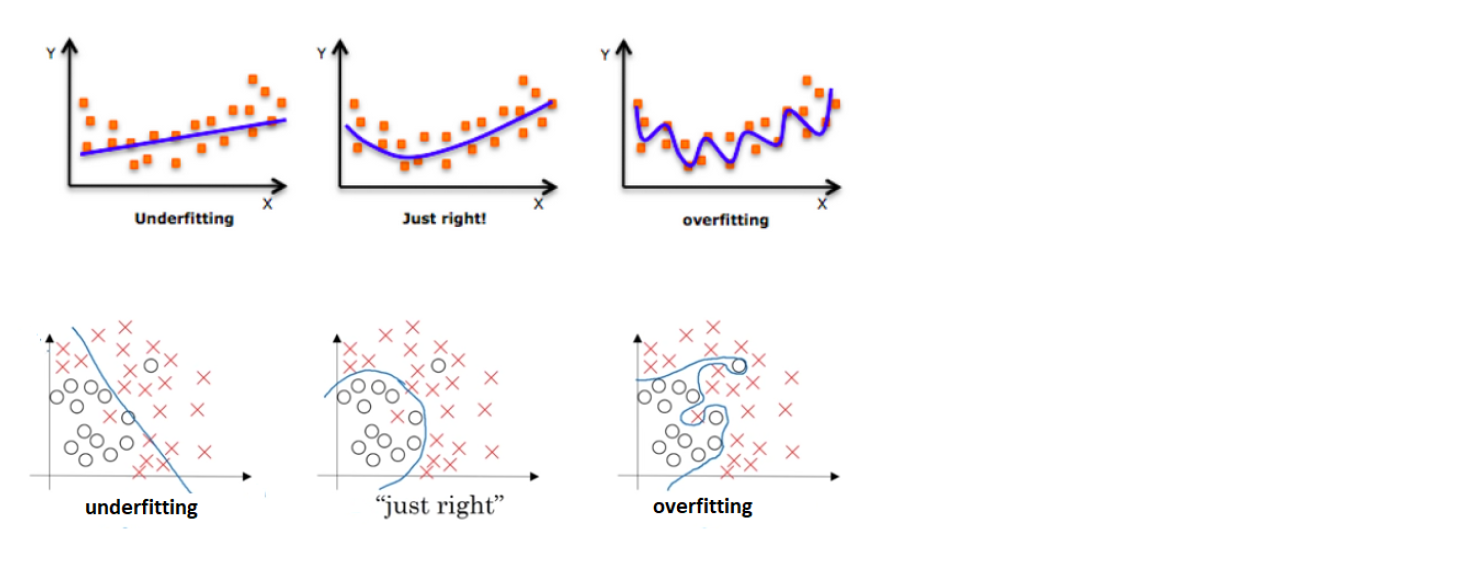

Overfitting can be reduced using **regularization**.

A common regularization method is **dropout**:

Part (**dropout rate**) of neurons in a layer is "switch off" during an update step. They are not used in forward propagation and their values are not updated during the backpropagation.




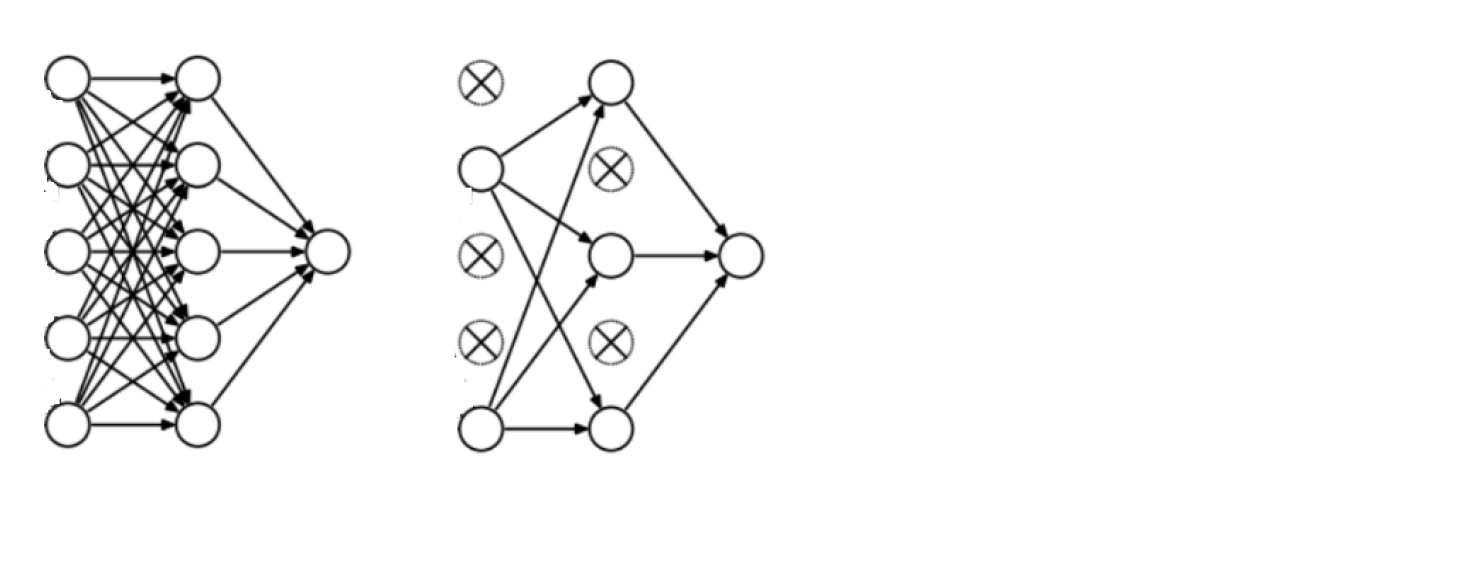

Datapoints are usually divided to three parts: **training, validation and test**.

Network is trained i.e the coefficients are determined using training-data by minimizing the cost.

**Hyperparameters** (number of hidden layers, number of neurons in layers, learning rate, number of epochs, batch size, dropout rate,...) are determined such that they give the best result for validation data.

Finally the trained network is tested using test-data.


##**Classification, 7 variables, 2 classes**

https://www.kaggle.com/datasets

https://pandas.pydata.org/

https://jakevdp.github.io/PythonDataScienceHandbook/index.html




In [2]:
#load banana_quality.csv to colab
#read it to a Pandas library's dataframe df
import pandas as pd
df=pd.read_csv('/content/banana_quality.csv')
df.head() #first 5 rows

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good

Goal: to predict Quality (Good/Bad) using the other variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [4]:
df.shape

(8000, 8)

In [5]:
df.columns #column names

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [6]:
#column
df['Size'] #using column names
df.iloc[:,0] #using column numbers

0      -1.924968
1      -2.409751
2      -0.357607
3      -0.868524
4       0.651825
          ...   
7995   -6.414403
7996    0.851143
7997    1.422722
7998   -2.131904
7999   -2.660879
Name: Size, Length: 8000, dtype: float64

In [7]:
df.index #row names

RangeIndex(start=0, stop=8000, step=1)

In [8]:
#row
r=0
df.loc[r] #using row names
df.iloc[r] #using row numbers

Size          -1.924968
Weight         0.468078
Sweetness      3.077832
Softness      -1.472177
HarvestTime    0.294799
Ripeness        2.43557
Acidity         0.27129
Quality            Good
Name: 0, dtype: object

In [9]:
#element
r=0
c=0
df.loc[r,'Size'] #using row and column names
df.iloc[r,c] #using row and column numbers

-1.9249682

In [10]:
#coordinates and Quality to numpy arrays
X=np.array(df.iloc[:,:7])

In [11]:
#values in column Quality
df['Quality'].unique()

array(['Good', 'Bad'], dtype=object)

In [12]:
y=np.zeros(8000)
y[df['Quality']=='Good']=1

In [13]:
X.shape

(8000, 7)

In [14]:
print(y.shape)
print(y[y==1].shape)

(8000,)
(4006,)


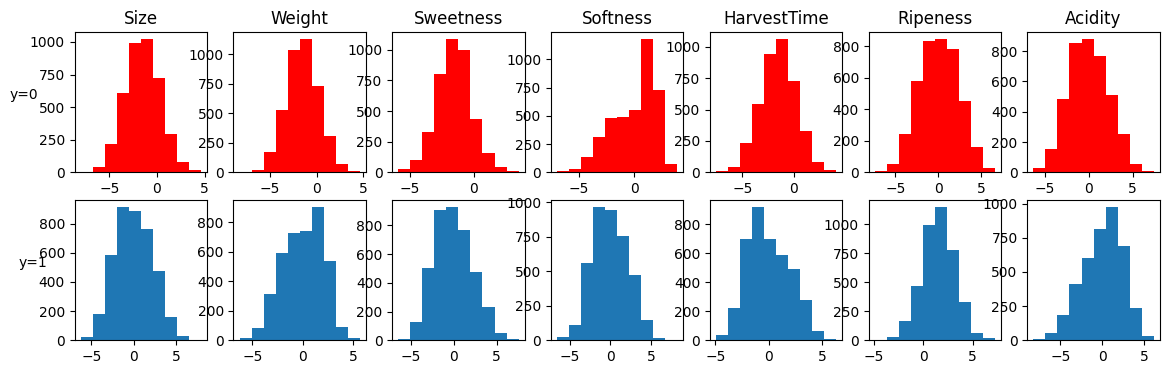

In [15]:
#distributions of values of coordinates
cols = df.columns
plt.figure(figsize=(14,4))
for k in range(7):
  plt.subplot(2,7,k+1)
  plt.hist(X[y==0,k],facecolor='r')
  plt.title(cols[k])
  if k==0:
    plt.ylabel('y=0',rotation=0)
  plt.subplot(2,7,k+8)
  plt.hist(X[y==1,k])
  if k==0:
    plt.ylabel('y=1',rotation=0)

In [16]:
#split datapoints to training and test/validation (70%/30%)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [17]:
Xtrain.shape

(5600, 7)

In [18]:
#normalize training data (means=0,stds=1)
mu=np.mean(Xtrain,axis=0)
s=np.std(Xtrain,axis=0)
np.set_printoptions(linewidth=1000)
print(mu)
print(s)
#scaled coordinates
Xtrain_hat=(Xtrain-mu)/s
Xtest_hat=(Xtest-mu)/s

[-0.733 -0.767 -0.776 -0.012 -0.743  0.806 -0.008]
[2.151 2.027 1.947 2.084 1.994 2.112 2.301]


In [20]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense
N=100
model = Sequential()
model.add(Input(shape=(7,)))
model.add(Dense(N, activation='relu'))
model.add(Dropout(0.1)) #switch off 10% of the neurons in hidden layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

More sophisticated optimizer:
**Adam** = Adaptive Moment Estimation


https://keras.io/api/optimizers/adam/

https://towardsdatascience.com/the-math-behind-adam-optimizer-c41407efe59b

Optimizers available in Keras:
https://keras.io/api/optimizers/

In [21]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), #0.001 is the default learning rate for Adam
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [22]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
#save the coefficients giving the best accuracy for validation/test data during training
from keras.api.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/banana_kertoimet.weights.h5', #kertoimet = coefficients
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [24]:
history = model.fit(Xtrain_hat,ytrain,
epochs=1000,
batch_size=560,
validation_data=(Xtest_hat, ytest),
callbacks=[callback])

Epoch 1/1000
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5665 - loss: 0.6813
Epoch 1: val_accuracy improved from -inf to 0.73625, saving model to /content/drive/MyDrive/banana_kertoimet.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5815 - loss: 0.6745 - val_accuracy: 0.7362 - val_loss: 0.6072
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7535 - loss: 0.5892 
Epoch 2: val_accuracy improved from 0.73625 to 0.82083, saving model to /content/drive/MyDrive/banana_kertoimet.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7552 - loss: 0.5878 - val_accuracy: 0.8208 - val_loss: 0.5370
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8268 - loss: 0.5192 
Epoch 3: val_accuracy improved from 0.82083 to 0.84458, saving model to /content/drive/MyDrive/banana_kertoimet.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8274 - loss: 0.5181 - val_accuracy: 0.8446 - val_loss: 0.4791
Epoch 4/1000
10/10 ━━━━━━━

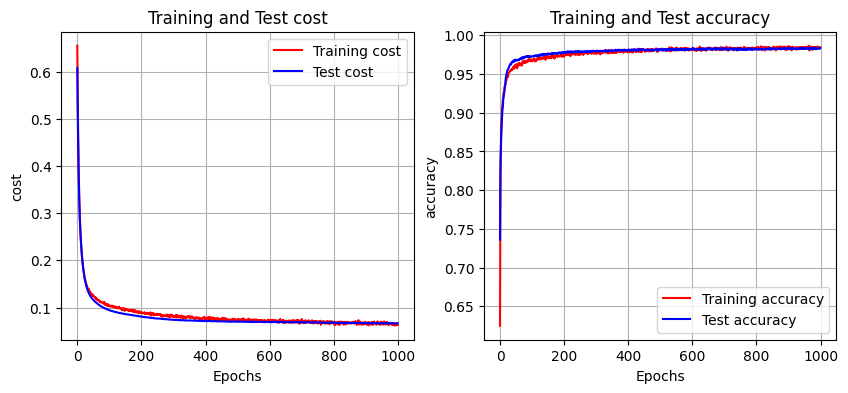

In [25]:
train_cost = history.history['loss']
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [26]:
#load best weights
model.load_weights('/content/drive/MyDrive/banana_kertoimet.weights.h5')
train_loss,train_acc=model.evaluate(Xtrain_hat,ytrain,verbose=0)
test_loss,test_acc=model.evaluate(Xtest_hat,ytest,verbose=0)
print(train_acc)
print(test_acc)
print(train_loss)
print(test_loss)

0.9867857098579407
0.9837499856948853
0.06038271635770798
0.06893052905797958


In [27]:
#save model
model.save('/content/drive/MyDrive/banana_model.keras')

In [28]:
#load saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/banana_model.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,705 (10.57 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,804 (7.05 KB)

In [29]:
k=0
model.predict(Xtest_hat[k].reshape(1,7))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.]], dtype=float32)

In [30]:
ytest[k]

0.0

In [31]:
atest_pred=model.predict(Xtest_hat)[:,0]
mtest=ytest.shape[0]
ytest_pred=np.zeros(mtest)
ytest_pred[atest_pred>=0.5]=1
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ytest_pred)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1225,   14],
       [  25, 1136]])

In [32]:
#compare logistic regression
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression().fit(Xtrain_hat,ytrain)
ytest_pred_LR=modelLR.predict(Xtest_hat)
confusion_matrix(ytest,ytest_pred_LR)

array([[1053,  186],
       [ 131, 1030]])

In [33]:
#new banana :['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness','Acidity']
xt=np.array([-2.0,0.4,2.8,-1.6,0.35,2.2,0.15])

mu=np.array([-0.733,-0.767,-0.776,-0.012,-0.743,0.806,-0.008])
s=np.array([2.151,2.027,1.947,2.084,1.994,2.112,2.301])

xt_hat=(xt-mu)/s
model.predict(xt_hat.reshape((1,7)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[0.999]], dtype=float32)

## **Classification, 784 variables, 10 classes**


 **MNIST digits classification dataset**

 [Modified National Institute of Standards and Technology](https://keras.io/api/datasets/mnist/)

 This is a dataset of  28x28 grayscale images of the 10 digits, a training set of 60,000 examples and a test set of 10,000 examples

 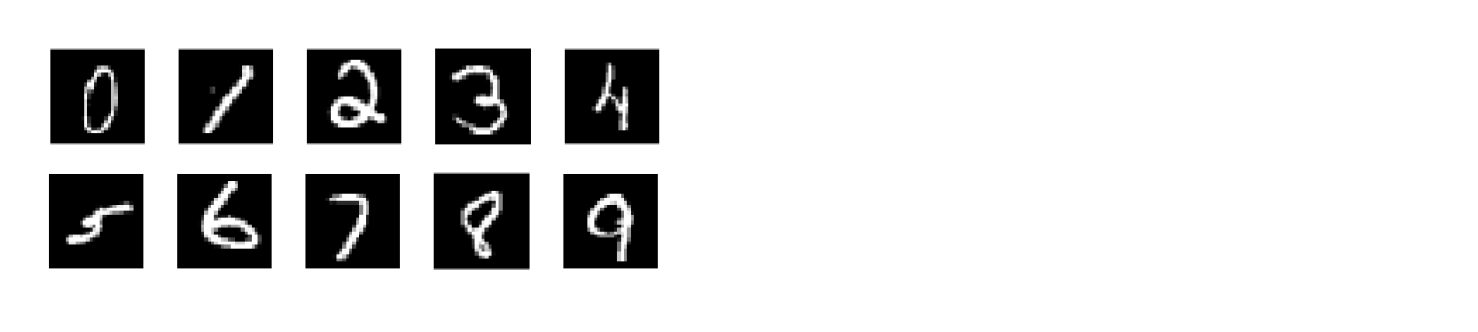



In [34]:
#load MNIST-data
from tensorflow import keras
from keras.api.datasets import mnist
#from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

#xtrain = (60000,28,28)-array, training-data, pixel values integers 0-255, 0 = black, 255 = white
#ytrain = (60000,)-array, classes 0,1,2,..,9
#xtest = (10000,28,28)-array, test-data
#ytrain = (10000,)-array, classes

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
np.set_printoptions(linewidth=1000)
print(xtrain[0])
print(ytrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [36]:
#scale values to floats 0...1
xtrain=xtrain/255.0
xtest=xtest/255.0
np.set_printoptions(precision=3)
print(xtrain[0])

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.651 1.    0.969 0.498

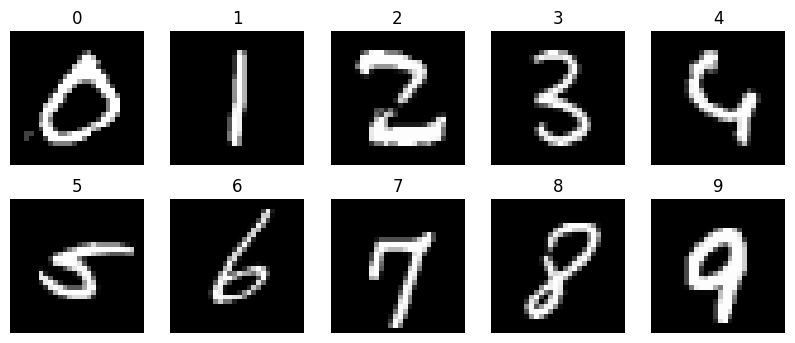

In [37]:
#example from each class
plt.figure(figsize=(10,4))
for k in range(10):
  xtraink=xtrain[ytrain==k] #class k
  mk=xtraink.shape[0]
  m=np.random.randint(mk)
  plt.subplot(2,5,k+1)
  plt.imshow(xtraink[m], cmap = 'gray')
  plt.title(str(k))
  plt.axis('off')
plt.show()


28x28 $\to$ 784:
$
\left[\begin{array}{cccc}
1&2&\dots&28\\
29&30&\dots&56\\
\vdots&\vdots&\ddots&\vdots\\
757&758&\dots&784
\end{array}\right]\quad \leftrightarrow\quad [1,2,\dots,784]
$

In [38]:
Xtrain=xtrain.reshape((60000,784))
Xtest=xtest.reshape((10000,784))

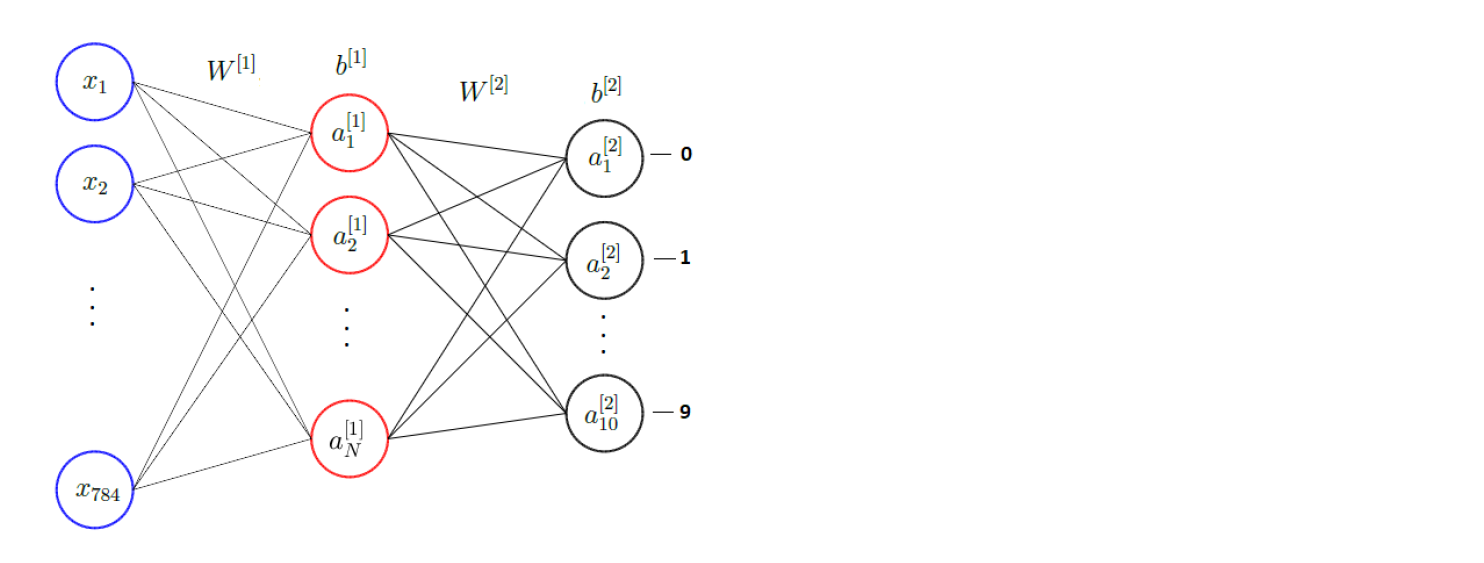

In [39]:
#from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense

N=100

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dropout(rate=0.2))
model.add(Dense(N, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_1 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

More sophisticated optimizer:
**Adam** = Adaptive Moment Estimation


https://keras.io/api/optimizers/adam/

https://towardsdatascience.com/the-math-behind-adam-optimizer-c41407efe59b

Optimizers available in Keras:
https://keras.io/api/optimizers/

In [40]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [41]:
from keras.api.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/mnist_kertoimet.weights.h5',
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [42]:
history=model.fit(Xtrain, ytrain,
                  epochs=100,
                  batch_size=1000,
                  validation_data=(Xtest,ytest),
                  callbacks=[callback])

Epoch 1/100
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5390 - loss: 1.4753
Epoch 1: val_accuracy improved from -inf to 0.90150, saving model to /content/drive/MyDrive/mnist_kertoimet.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5448 - loss: 1.4588 - val_accuracy: 0.9015 - val_loss: 0.3790
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8665 - loss: 0.4552
Epoch 2: val_accuracy improved from 0.90150 to 0.92230, saving model to /content/drive/MyDrive/mnist_kertoimet.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8667 - loss: 0.4547 - val_accuracy: 0.9223 - val_loss: 0.2834
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8953 - loss: 0.3592
Epoch 3: val_accuracy improved from 0.92230 to 0.93330, saving model to /content/drive/MyDrive/mnist_kertoimet.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8953 - loss: 0.3589 - val_accuracy: 0.9333 - val_loss: 0.2383
Epoch 4/100
58/60 ━━━━━━━━━━━━━

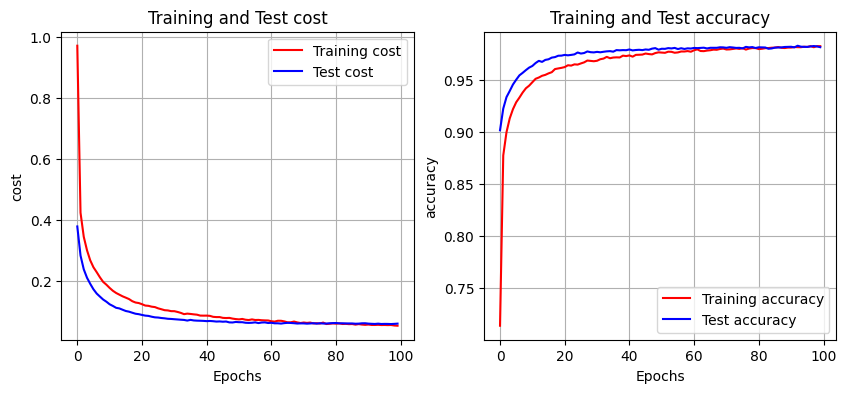

In [43]:
train_cost = history.history['loss']
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [44]:
#load best weights
model.load_weights('/content/drive/MyDrive/mnist_kertoimet.weights.h5')

train_loss,train_acc=model.evaluate(Xtrain,ytrain,verbose=0)
test_loss,test_acc=model.evaluate(Xtest,ytest,verbose=0)
print(train_acc)
print(test_acc)

0.9966166615486145
0.9825999736785889


In [45]:
#save the model
model.save('/content/drive/MyDrive/mnist_model.keras')

In [46]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/mnist_model.keras')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_1 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,532 (931.77 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,022 (621.18 KB)

In [47]:
#testpoint number k
k=np.random.randint(10000)
xt=Xtest[k]
yt=ytest[k]
at_pred=model.predict(xt.reshape((1,784))) #predicted probabilities, (1,10)-array
yt_pred=np.argmax(at_pred[0,:]) #predicted class
print(at_pred)
print(yt_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.    0.    0.    0.006 0.    0.    0.    0.994 0.    0.   ]]
7


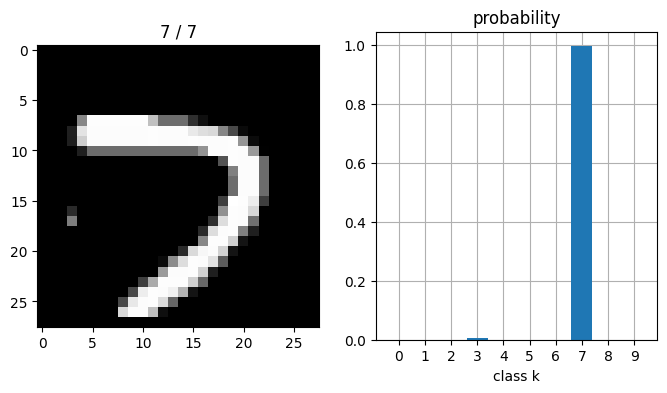

In [48]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(xt.reshape((28,28)), cmap = 'gray')
plt.title(str(yt)+' / '+str(yt_pred))

plt.subplot(1,2,2)
plt.bar(np.linspace(0,9,10),at_pred[0,:],zorder=2)
plt.xticks(np.linspace(0,9,10))
plt.xlabel('class k')
plt.title('probability')
plt.grid()
plt.show()

In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix

ytest_pred=np.argmax(model.predict(Xtest),axis=1)
print(confusion_matrix(ytest, ytest_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 971    1    1    1    0    1    2    0    2    1]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   4    0 1015    1    1    0    2    5    4    0]
 [   0    0    3  992    0    5    0    5    3    2]
 [   1    1    2    0  966    0    3    0    1    8]
 [   2    1    0    7    1  870    3    2    3    3]
 [   2    3    1    1    1    3  945    0    2    0]
 [   1    3   13    2    0    0    0 1002    2    5]
 [   2    0    1    4    3    0    1    4  956    3]
 [   2    4    0    5    5    2    0    5    3  983]]


174


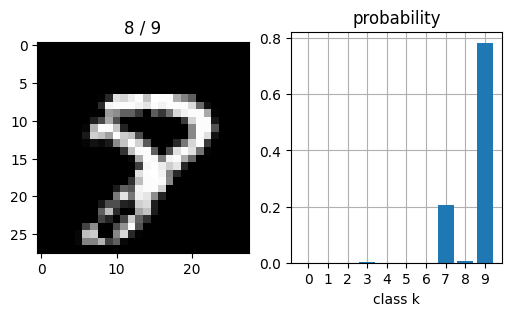

In [50]:
#wrongly classified test-points
Xtest_vaarin=Xtest[ytest_pred!=ytest,:] #väärin=wrong
ytest_vaarin=ytest[ytest_pred!=ytest]


mv=len(ytest_vaarin)
print(mv)
k=np.random.randint(0,mv)

xt=Xtest_vaarin[k]
yt=ytest_vaarin[k]
at_pred=model.predict(xt.reshape((1,784)),verbose=0) #probabilities, (1,10)-array
yt_pred=np.argmax(at_pred[0,:]) #predicted class

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(xt.reshape((28,28)), cmap = 'gray')
plt.title(str(yt)+' / '+str(yt_pred))

plt.subplot(1,2,2)
plt.bar(np.linspace(0,9,10),at_pred[0,:],zorder=2)
plt.xticks(np.linspace(0,9,10))
plt.xlabel('class k')
plt.title('probability')
plt.grid()
plt.show()




## **Regression**










Neural networks can be also used for regression i.e to predict a value of $y$ using coordinates $x_1,x_2,\dots,x_n$.

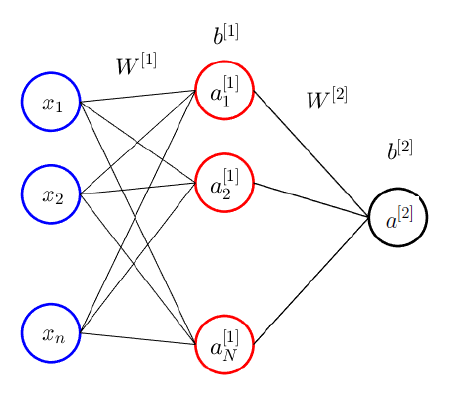

In regression, output layer doesn't include an activation function i.e if
$x=[x_1,x_2,\dots,x_n]$,
then

$$\begin{array}{l}\\
z^{[1]}=x@W^{[1]}+b^{[1]},\quad a^{[1]}=g(z^{[1]})\\\\
z^{[2]}=a^{[1]}@W^{[2]} +b^{[2]},\quad a^{[2]}=z^{[2]}\\\\
\end{array}
$$



and the cost function is either

**Mean squared error (mse):**

$$C=\displaystyle{\frac{1}{m}\, \sum_{i=1}^m (a^{[2](i)}-y^{(i)})^2}$$

or


**Mean absolute error (mae):**

$$\displaystyle{C=\frac{1}{m}\, \sum_{i=1}^m |a^{[2](i)}-y^{(i)}|}$$


##**Regression, 1 variable**



Data points $x^{(i)},y^{(i)}$

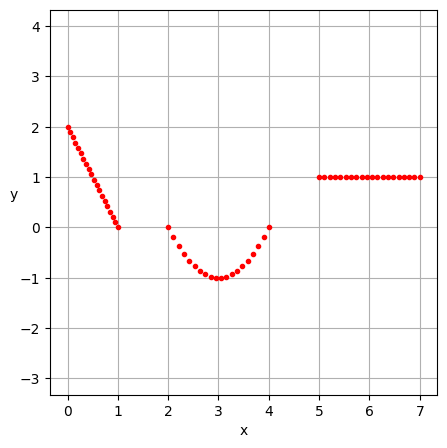

In [ ]:
x1=np.linspace(0,1,20)
y1=np.linspace(2,0,20)

x2=np.linspace(2,4,20)
y2=(x2-3)**2-1

x3=np.linspace(5,7,20)
y3=np.ones(20)

x=np.hstack((x1,x2,x3))
y=np.hstack((y1,y2,y3))


plt.figure(figsize=(5,5))
plt.plot(x,y,'r.')
plt.grid()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()

In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                40        
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.api.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [ ]:
history=model.fit(x.reshape((60,1)),y,
                  epochs=3000,
                  batch_size=60)

Striimattava tuloste lyhennetty viimeiseen 5000 riviin.
1/1 [==============================] - 0s 9ms/step - loss: 0.0648 - mae: 0.1969
Epoch 502/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0648 - mae: 0.1968
Epoch 503/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0647 - mae: 0.1968
Epoch 504/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0647 - mae: 0.1967
Epoch 505/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0647 - mae: 0.1967
Epoch 506/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0646 - mae: 0.1966
Epoch 507/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0646 - mae: 0.1966
Epoch 508/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0645 - mae: 0.1965
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0645 - mae: 0.1965
Epoch 510/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0645 - mae: 0.1964
Epoch 5

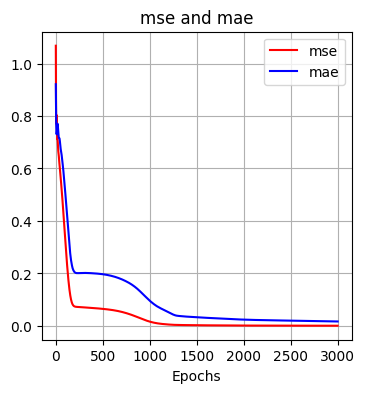

In [ ]:
mse = history.history['loss']
mae = history.history['mae']

plt.figure(figsize=(4,4))
plt.plot(mse, 'r', label='mse')
plt.plot(mae, 'b', label='mae')
plt.title('mse and mae')
plt.xlabel('Epochs')
plt.legend()
plt.grid()


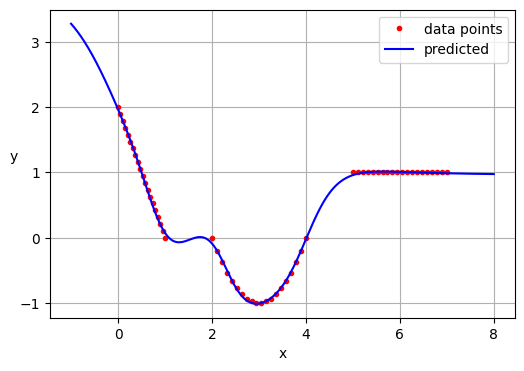

In [ ]:
#predicted values for y
xx=np.linspace(-1,8,1000)
ypred=model.predict(xx.reshape((1000,1)),verbose=0)

plt.figure(figsize=(6,4))
plt.plot(x,y,'r.',label='data points')
plt.plot(xx,ypred,'b',label='predicted')
plt.grid()
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()
plt.show()

##**Regression, 9 variables**

In [51]:
#load CarsData.csv to colab
#read it to Pandas library's dataframe
import pandas as pd
df=pd.read_csv('CarsData.csv')

In [52]:
df.head() #first 5 rows

model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford

The goal is to predict the price using the other variables

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [54]:
df.columns #column names

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

In [55]:
df.index #row names

RangeIndex(start=0, stop=97712, step=1)

In [56]:
df.shape

(97712, 10)

In [57]:
#row
r=0
df.loc[r] #row r, using index names
print(df.iloc[r],'\n') #using row number

#column
df['model'] #using column names
print(df.iloc[:,0],'\n') #using column numbers

#element
df.loc[r,'year'] #using index and column names
print(df.iloc[r,1]) #using row and column numbers

model              I10
year              2017
price             7495
transmission    Manual
mileage          11630
fuelType        Petrol
tax                145
mpg               60.1
engineSize         1.0
Manufacturer    hyundi
Name: 0, dtype: object 

0                  I10
1                 Polo
2             2 Series
3         Yeti Outdoor
4               Fiesta
             ...      
97707           Fiesta
97708         3 Series
97709           Fiesta
97710            Astra
97711      Grandland X
Name: model, Length: 97712, dtype: object 

2017


In [58]:
#model names
models=df['model'].unique()
models

array([' I10', ' Polo', ' 2 Series', ' Yeti Outdoor', ' Fiesta', ' C-HR', ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Up', ' Golf', ' Corsa', ' RAV4', ' GLA Class', ' Aygo', ' Q5', ' Karoq', ' Scala', ' Auris', ' Tucson', ' A4', ' Viva', ' Kodiaq', ' C Class', ' Mondeo', ' Citigo', ' Yaris', ' X4', ' Octavia', ' Astra', ' Focus', ' 3 Series', ' GLC Class', ' Q3', ' B-MAX', ' C-MAX', ' IX20', ' X5', ' T-Cross', ' Shuttle', ' Insignia', ' Zafira', ' A3', ' A5', ' SL CLASS', ' EcoSport', ' X1', ' Fabia', ' Golf SV', ' Verso', ' Yeti', ' Mokka X', ' Antara', ' E Class', ' 4 Series', ' Superb', ' 5 Series', ' 8 Series', ' B Class', ' Ka+', ' X2', ' GLE Class', ' A6', ' Mokka', ' Passat', ' Kamiq', ' Adam', ' Q7', ' Tiguan Allspace', ' X3', ' A1', ' Grandland X', ' Meriva', ' Tourneo Connect', ' Arteon', ' TT', ' GLS Class', ' Santa Fe', ' I30', ' S Class', ' Ioniq', ' Edge', ' S-MAX', ' SLK', ' Crossland X', ' 7 Series', ' T-Roc', ' Q2', ' CL Class', ' CLA Class', ' 6 Series',
       ' V

In [59]:
#number of different models
mvc=df['model'].value_counts()
mvc

model
 Fiesta             6509
 Golf               4797
 Focus              4555
 C Class            3694
 Corsa              3285
                    ... 
 Transit Tourneo       1
 Escort                1
200                    1
 Ranger                1
220                    1
Name: count, Length: 195, dtype: int64

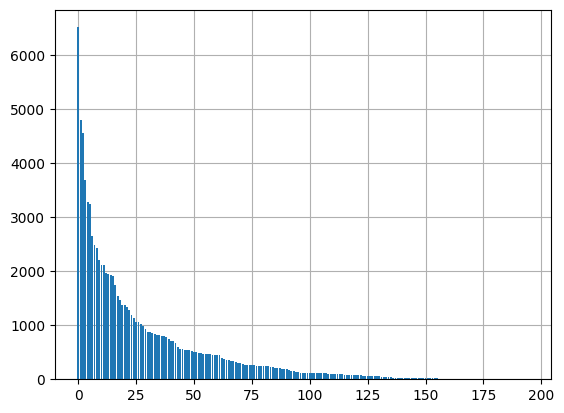

In [60]:
plt.bar(np.arange(0,195),mvc,zorder=2)
plt.grid()
plt.show()

In [61]:
nmin=1000
mvc[mvc>nmin]

model
Fiesta      6509
Golf        4797
Focus       4555
C Class     3694
Corsa       3285
Polo        3244
Astra       2655
A Class     2474
3 Series    2434
Kuga        2208
Yaris       2117
Mokka X     2111
1 Series    1962
Aygo        1940
E Class     1928
A3          1917
Tiguan      1743
Fabia       1544
Octavia     1466
Q3          1379
A4          1375
A1          1337
Tucson      1280
2 Series    1188
EcoSport    1127
I10         1061
5 Series    1051
Insignia    1015
Name: count, dtype: int64

In [62]:
modelnames=mvc[mvc>nmin].index
modelnames

Index([' Fiesta', ' Golf', ' Focus', ' C Class', ' Corsa', ' Polo', ' Astra',
       ' A Class', ' 3 Series', ' Kuga', ' Yaris', ' Mokka X', ' 1 Series',
       ' Aygo', ' E Class', ' A3', ' Tiguan', ' Fabia', ' Octavia', ' Q3',
       ' A4', ' A1', ' Tucson', ' 2 Series', ' EcoSport', ' I10', ' 5 Series',
       ' Insignia'],
      dtype='object', name='model')

In [63]:
#drop rare models with less than nmin representatives
df2=df.loc[df['model'].isin(modelnames),:].copy()

In [71]:
m,n=df2.shape
print(m)
print(n)

63396
9


In [65]:
y=np.array(df2['price'])
df2.drop(columns=['price'],inplace=True)
df2.head(10)

model  year transmission  mileage fuelType  tax   mpg  engineSize  \
0         I10  2017       Manual    11630   Petrol  145  60.1         1.0   
1        Polo  2017       Manual     9200   Petrol  145  58.9         1.0   
2    2 Series  2019    Semi-Auto     1614   Diesel  145  49.6         2.0   
4      Fiesta  2017       Manual    19353   Petrol  125  54.3         1.2   
6        Kuga  2019       Manual     7038   Petrol  145  34.4         1.5   
7      Tiguan  2019    Semi-Auto     3000   Petrol  145  30.4         2.0   
8      Fiesta  2018       Manual    31639   Petrol  145  65.7         1.0   
9     A Class  2017       Manual     9663   Diesel   30  62.8         2.1   
10       Kuga  2017    Semi-Auto    30000   Diesel  145  54.3         2.0   
11   1 Series  2016       Manual    40313   Diesel    0  78.5         1.5   

   Manufacturer  
0        hyundi  
1    volkswagen  
2           BMW  
4          ford  
6          ford  
7    volkswagen  
8          ford  
9          merc  
10         ford  
11          BMW

In [66]:
#categorical variables
cat_columns=['model','transmission','fuelType','Manufacturer']
df2[cat_columns].head(10)

model transmission fuelType Manufacturer
0         I10       Manual   Petrol       hyundi
1        Polo       Manual   Petrol   volkswagen
2    2 Series    Semi-Auto   Diesel          BMW
4      Fiesta       Manual   Petrol         ford
6        Kuga       Manual   Petrol         ford
7      Tiguan    Semi-Auto   Petrol   volkswagen
8      Fiesta       Manual   Petrol         ford
9     A Class       Manual   Diesel         merc
10       Kuga    Semi-Auto   Diesel         ford
11   1 Series       Manual   Diesel          BMW

In [67]:
df2['model'].unique()

array([' I10', ' Polo', ' 2 Series', ' Fiesta', ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Golf', ' Corsa', ' Aygo', ' Tucson', ' A4', ' C Class', ' Yaris', ' Octavia', ' Astra', ' Focus', ' 3 Series', ' Q3', ' Insignia', ' A3', ' EcoSport', ' Fabia', ' Mokka X', ' E Class', ' 5 Series', ' A1'], dtype=object)

In [68]:
df2['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype=object)

In [69]:
df2['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

In [70]:
df2['Manufacturer'].unique()

array(['hyundi', 'volkswagen', 'BMW', 'ford', 'merc', 'vauxhall', 'toyota', 'Audi', 'skoda'], dtype=object)

In [72]:
#change categoricals to integers 0,1,...,number of classes-1
X_cat=np.zeros((m,4))

for s in range(4):
  col=cat_columns[s]
  names=df2[col].unique()
  n_names=names.size
  for k in range(n_names):
    X_cat[df2[col]==names[k],s]=k

In [73]:
X_cat[:10,:]

array([[0., 0., 0., 0.],
       [1., 0., 0., 1.],
       [2., 1., 1., 2.],
       [3., 0., 0., 3.],
       [4., 0., 0., 3.],
       [5., 1., 0., 1.],
       [3., 0., 0., 3.],
       [6., 0., 1., 4.],
       [4., 1., 1., 3.],
       [7., 0., 1., 2.]])

In [74]:
#numerical variables
num_columns=['year','mileage','tax','mpg','engineSize']
X_num=np.array(df2[num_columns])
X_num[:10,:]

array([[ 2017. , 11630. ,   145. ,    60.1,     1. ],
       [ 2017. ,  9200. ,   145. ,    58.9,     1. ],
       [ 2019. ,  1614. ,   145. ,    49.6,     2. ],
       [ 2017. , 19353. ,   125. ,    54.3,     1.2],
       [ 2019. ,  7038. ,   145. ,    34.4,     1.5],
       [ 2019. ,  3000. ,   145. ,    30.4,     2. ],
       [ 2018. , 31639. ,   145. ,    65.7,     1. ],
       [ 2017. ,  9663. ,    30. ,    62.8,     2.1],
       [ 2017. , 30000. ,   145. ,    54.3,     2. ],
       [ 2016. , 40313. ,     0. ,    78.5,     1.5]])

In [75]:
#combine
X=np.hstack((X_cat,X_num))
X.shape


(63396, 9)

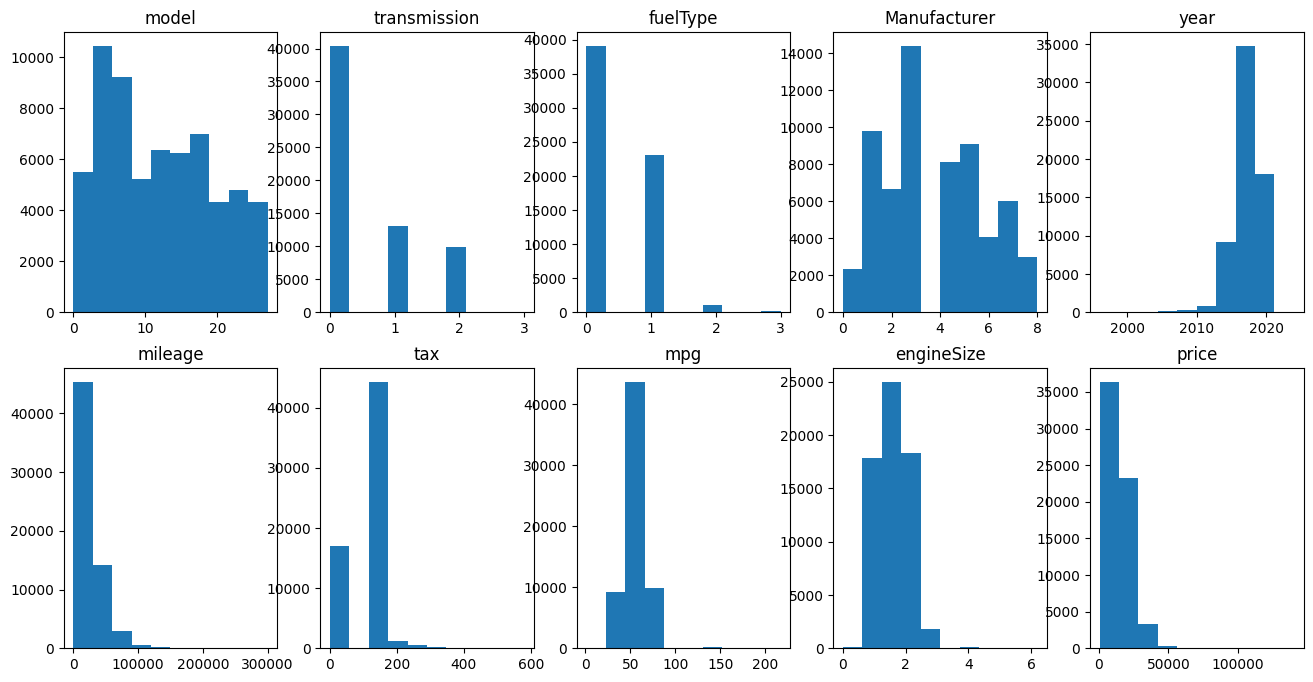

In [76]:
cols=['model','transmission','fuelType','Manufacturer','year','mileage','tax','mpg','engineSize']
plt.figure(figsize=(16,8))
for k in range(9):
  plt.subplot(2,5,k+1)
  plt.hist(X[:,k])
  plt.title(cols[k])
plt.subplot(2,5,10)
plt.hist(y)
plt.title('price')
plt.show()

In [77]:
#drop the rare (high) prices
print(y.shape)
print(y[y>40000].shape)

(63396,)
(469,)


In [78]:
X=X[y<=40000,:]
y=y[y<=40000]

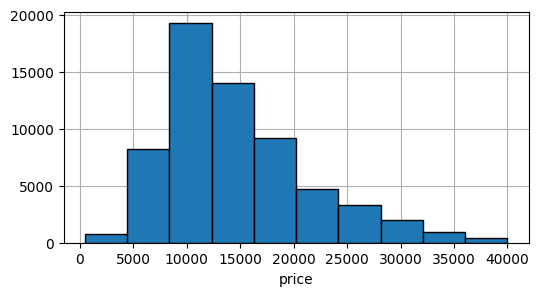

In [79]:
plt.figure(figsize=(6,3))
plt.hist(y,10,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('price')
plt.show()

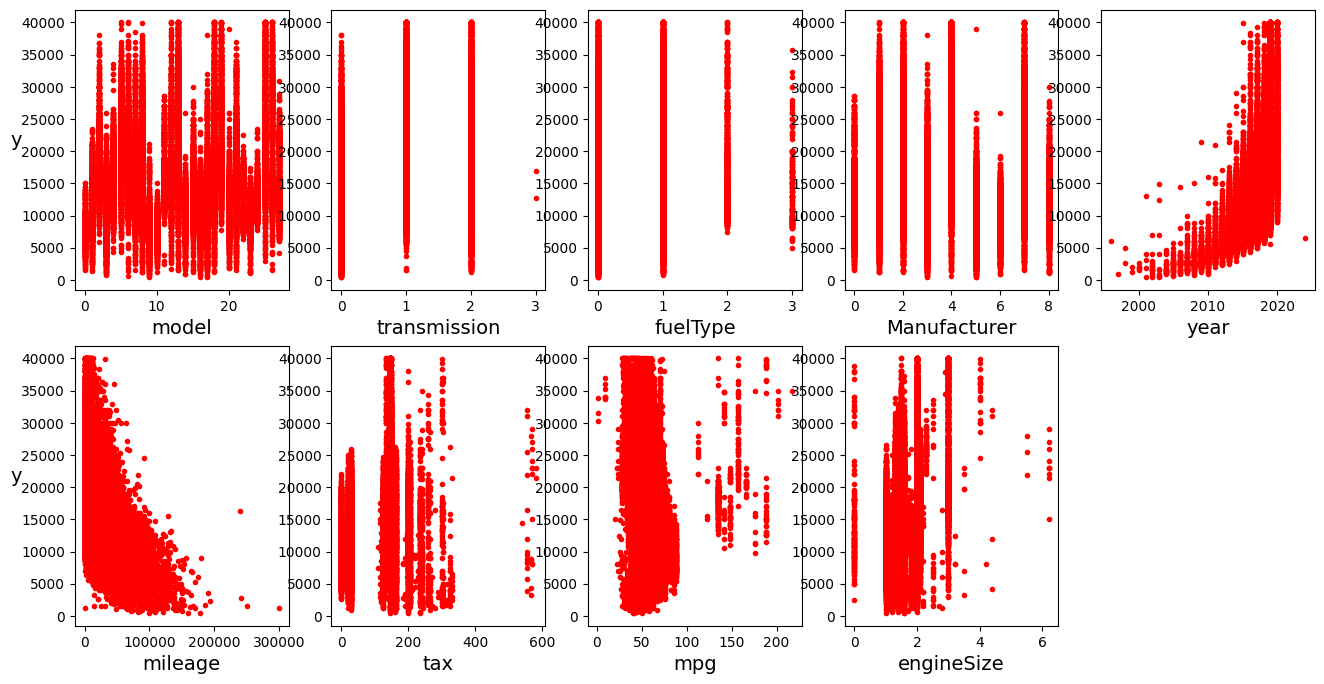

In [80]:
#y vs. coordinates
plt.figure(figsize=(16,8))
for k in range(9):
  plt.subplot(2,5,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.xlabel(cols[k],fontsize=14)
  if (k==0) or (k==5):
    plt.ylabel('y',rotation=0,fontsize=14)
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [82]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(44048, 9)
(44048,)
(18879, 9)
(18879,)


In [83]:
mu=np.mean(Xtrain,axis=0)
s=np.std(Xtrain,axis=0)
print(mu)
print(s)
Xtrain_hat=(Xtrain-mu)/s
Xtest_hat=(Xtest-mu)/s

[   11.958     0.514     0.404     3.684  2017.033 23530.279   112.88     56.857     1.55 ]
[    7.598     0.749     0.538     2.136     2.012 20537.504    61.038    12.79      0.454]


In [93]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense
N=1000
model = Sequential()
model.add(Input(shape=(9,)))
model.add(Dense(N, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,001 (42.97 KB)

 Trainable params: 11,001 (42.97 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), #0.001 is the default learning rate for Adam
              loss='mae')



In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
#save the coefficients that give best result for validation data during training
from keras.api.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/cars_kertoimet.weights.h5', #kertoimet = coefficients
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [98]:
history=model.fit(Xtrain_hat,ytrain,
                  epochs= 100,
                  batch_size=1000,
                  validation_data=(Xtest_hat,ytest),
                  callbacks=[callback]
                  )
#first 300 epochs with learning rate 0.1, then 100 epochs with learning rate 0.01

Epoch 1/100
43/45 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1316.3101
Epoch 1: val_loss improved from 1140.17603 to 1132.00476, saving model to /content/drive/MyDrive/cars_kertoimet.weights.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 1316.0242 - val_loss: 1132.0048
Epoch 2/100
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1311.1158
Epoch 2: val_loss improved from 1132.00476 to 1128.56641, saving model to /content/drive/MyDrive/cars_kertoimet.weights.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1310.8291 - val_loss: 1128.5664
Epoch 3/100
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1305.4701
Epoch 3: val_loss improved from 1128.56641 to 1126.95740, saving model to /content/drive/MyDrive/cars_kertoimet.weights.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1305.6302 - val_loss: 1126.9574
Epoch 4/100
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1296.6268
Epoch 4: val_loss improved from 1126.95740 to 1125.53345, saving model to /content/drive/MyDrive/cars_kertoimet

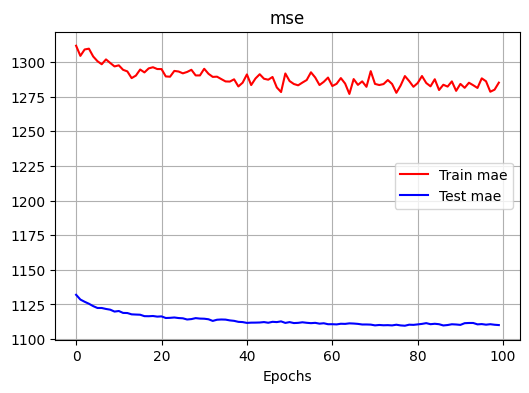

In [99]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']



plt.figure(figsize=(6,4))
plt.plot(train_loss, 'r', label='Train mae')
plt.plot(test_loss, 'b', label='Test mae')
plt.xlabel('Epochs')
plt.title('mse')
plt.legend()
plt.grid()



In [100]:
#load best weights
model.load_weights('/content/drive/MyDrive/cars_kertoimet.weights.h5')

train_mae=model.evaluate(Xtrain_hat,ytrain,verbose=0)
test_mae=model.evaluate(Xtest_hat,ytest,verbose=0)
print(train_mae)
print(test_mae)

1040.189697265625
1109.6636962890625


In [101]:
#save the model
model.save('/content/drive/MyDrive/cars_model_v1.keras')

In [102]:
#load a saved model
from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/cars_model_v1.keras')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,005 (128.93 KB)

 Trainable params: 11,001 (42.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,004 (85.96 KB)

In [103]:
#predictions for y
ytrain_pred=model.predict(Xtrain_hat)
print(ytrain_pred.shape)
ytest_pred=model.predict(Xtest_hat)
print(ytest_pred.shape)

1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
(44048, 1)
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(18879, 1)


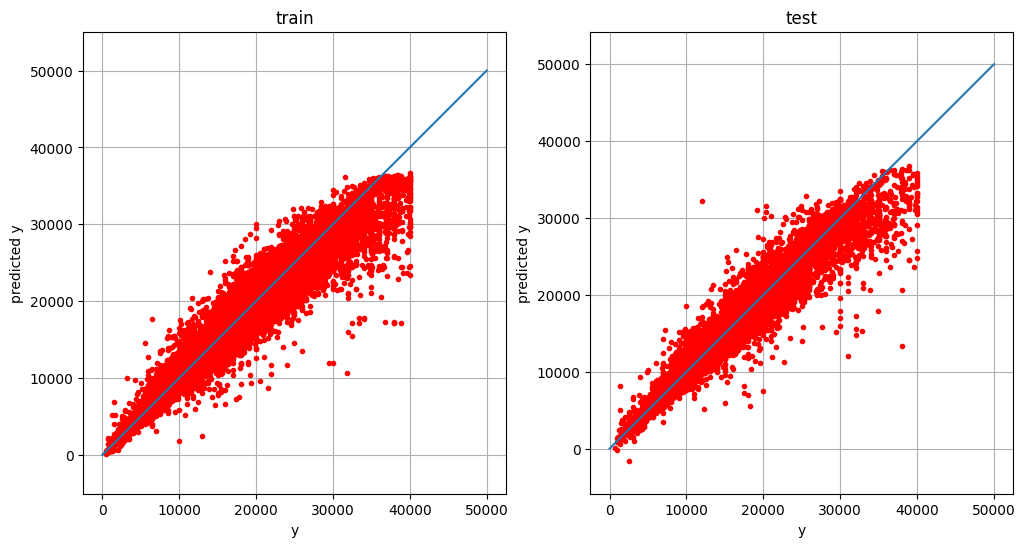

In [104]:
#y vs. predicted y

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(ytrain,ytrain_pred[:,0],'r.')
plt.plot([0,50000],[0,50000])
plt.title('train')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('predicted y')

plt.subplot(1,2,2)
plt.plot(ytest,ytest_pred[:,0],'r.')
plt.title('test')
plt.axis('equal')
plt.plot([0,50000],[0,50000])
plt.grid()
plt.xlabel('y')
plt.ylabel('predicted y')
plt.show()

In [105]:
print(ytest.shape)
print(ytest[np.abs(ytest-ytest_pred[:,0])<=1000].shape)

(18879,)
(11930,)


In [106]:
#compare linear regression
from sklearn.linear_model import LinearRegression
modelLR=LinearRegression().fit(Xtrain_hat,ytrain)

ytrain_predLR=modelLR.predict(Xtrain_hat)
mtrain=ytrain.shape[0]
maeLR_train=1/mtrain*np.sum(np.abs(ytrain-ytrain_predLR))
print(maeLR_train)
ytest_predLR=modelLR.predict(Xtest_hat)
mtest=ytest.shape[0]
maeLR_test=1/mtest*np.sum(np.abs(ytest-ytest_predLR))
print(maeLR_test)

2711.7404087312016
2714.038992963402


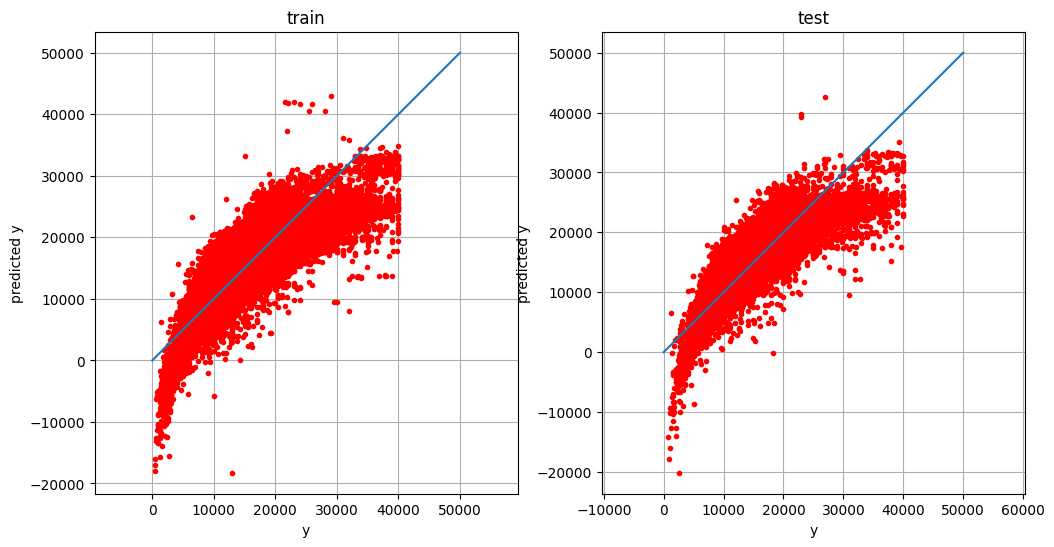

In [107]:
#y vs. predicted y

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(ytrain,ytrain_predLR,'r.')
plt.plot([0,50000],[0,50000])
plt.title('train')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('predicted y')

plt.subplot(1,2,2)
plt.plot(ytest,ytest_predLR,'r.')
plt.title('test')
plt.axis('equal')
plt.plot([0,50000],[0,50000])
plt.grid()
plt.xlabel('y')
plt.ylabel('predicted y')
plt.show()

In [108]:
k=0
model.predict(Xtest_hat[k,:].reshape((1,9)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[13319.725]], dtype=float32)

In [109]:
ytest[k]

14500

In [112]:
#test car
xt=np.zeros((1,9))
df2.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'Manufacturer'],
      dtype='object')

In [113]:
print(df2['model'].unique(),'\n')
print(df2['transmission'].unique(),'\n')
print(df2['fuelType'].unique(),'\n')
print(df2['Manufacturer'].unique())

[' I10' ' Polo' ' 2 Series' ' Fiesta' ' Kuga' ' Tiguan' ' A Class' ' 1 Series' ' Golf' ' Corsa' ' Aygo' ' Tucson' ' A4' ' C Class' ' Yaris' ' Octavia' ' Astra' ' Focus' ' 3 Series' ' Q3' ' Insignia' ' A3' ' EcoSport' ' Fabia' ' Mokka X' ' E Class' ' 5 Series' ' A1'] 

['Manual' 'Semi-Auto' 'Automatic' 'Other'] 

['Petrol' 'Diesel' 'Hybrid' 'Other'] 

['hyundi' 'volkswagen' 'BMW' 'ford' 'merc' 'vauxhall' 'toyota' 'Audi' 'skoda']


In [114]:
xt[0,0]=3
xt[0,1]=0
xt[0,2]=0
xt[0,3]=3

In [115]:
mu=np.array([11.958,0.514,0.404,3.684,2017.033,23530.279,112.88,56.857,1.55])
s=np.array([7.598,0.749,0.538,2.136,2.012,20537.504,61.038,12.79,0.454])

mu[4:]

array([ 2017.033, 23530.279,   112.88 ,    56.857,     1.55 ])

In [116]:
xt[0,4]=2010
xt[0,5]=25000
xt[0,6]=100
xt[0,7]=45
xt[0,8]=1.0

xt_hat=(xt-mu)/s
model.predict(xt_hat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[5143.367]], dtype=float32)

##**Regression, 50 variables**

In [154]:
#load CarsData.csv to colab
df=pd.read_csv('CarsData.csv')

In [155]:
mvc=df['model'].value_counts()
mvc

model
 Fiesta             6509
 Golf               4797
 Focus              4555
 C Class            3694
 Corsa              3285
                    ... 
 Transit Tourneo       1
 Escort                1
200                    1
 Ranger                1
220                    1
Name: count, Length: 195, dtype: int64

In [156]:
nmin=1000
modelnames=mvc[mvc>nmin].index
modelnames

Index([' Fiesta', ' Golf', ' Focus', ' C Class', ' Corsa', ' Polo', ' Astra',
       ' A Class', ' 3 Series', ' Kuga', ' Yaris', ' Mokka X', ' 1 Series',
       ' Aygo', ' E Class', ' A3', ' Tiguan', ' Fabia', ' Octavia', ' Q3',
       ' A4', ' A1', ' Tucson', ' 2 Series', ' EcoSport', ' I10', ' 5 Series',
       ' Insignia'],
      dtype='object', name='model')

In [157]:
df2=df.loc[df['model'].isin(modelnames)].copy()

In [158]:
y=np.array(df2['price'])
df2.drop(columns=['price'],inplace=True)
df2.head()

model  year transmission  mileage fuelType  tax   mpg  engineSize  \
0        I10  2017       Manual    11630   Petrol  145  60.1         1.0   
1       Polo  2017       Manual     9200   Petrol  145  58.9         1.0   
2   2 Series  2019    Semi-Auto     1614   Diesel  145  49.6         2.0   
4     Fiesta  2017       Manual    19353   Petrol  125  54.3         1.2   
6       Kuga  2019       Manual     7038   Petrol  145  34.4         1.5   

  Manufacturer  
0       hyundi  
1   volkswagen  
2          BMW  
4         ford  
6         ford

In [159]:
m,n=df2.shape
print(m)
print(n)

63396
9


In [160]:
cat_columns=['model','transmission','fuelType','Manufacturer']
df2[cat_columns].head(10)

model transmission fuelType Manufacturer
0         I10       Manual   Petrol       hyundi
1        Polo       Manual   Petrol   volkswagen
2    2 Series    Semi-Auto   Diesel          BMW
4      Fiesta       Manual   Petrol         ford
6        Kuga       Manual   Petrol         ford
7      Tiguan    Semi-Auto   Petrol   volkswagen
8      Fiesta       Manual   Petrol         ford
9     A Class       Manual   Diesel         merc
10       Kuga    Semi-Auto   Diesel         ford
11   1 Series       Manual   Diesel          BMW

In [161]:
number_of_names=np.zeros(4)
k=0
for col in cat_columns:
  names=df2[col].unique()
  n_names=names.size
  number_of_names[k]=n_names
  k+=1
print(number_of_names)
np.sum(number_of_names)

[28.  4.  4.  9.]


45.0

In [162]:
#change categoricals to integers 0,1,...,number of classes-1
X_cat=np.zeros((m,4))

for s in range(4):
  col=cat_columns[s]
  names=df2[col].unique()
  n_names=names.size
  for k in range(n_names):
    X_cat[df2[col]==names[k],s]=k

In [163]:
X_cat[:10,:]

array([[0., 0., 0., 0.],
       [1., 0., 0., 1.],
       [2., 1., 1., 2.],
       [3., 0., 0., 3.],
       [4., 0., 0., 3.],
       [5., 1., 0., 1.],
       [3., 0., 0., 3.],
       [6., 0., 1., 4.],
       [4., 1., 1., 3.],
       [7., 0., 1., 2.]])

In [164]:
#one-hot encoding of categoricals: integers -> array of zeros and one, one at the integer position
X_cat_oh=np.zeros((m,45))

for k in range(m):
  X_cat_oh[k,int(X_cat[k,0])]=1 #model = 28 coordinates, one 1, others = 0
  X_cat_oh[k,int(28+X_cat[k,1])]=1 #transmission = 4 coordinates, one 1, others = 0
  X_cat_oh[k,int(32+X_cat[k,2])]=1 #fuelType = 4 coordinates, one 1, others = 0
  X_cat_oh[k,int(36+X_cat[k,3])]=1 #Manufacturer = 9 coordinates, one 1, others = 0


In [209]:
k=5
X_cat[k,:]

array([5., 1., 0., 1.])

In [210]:
X_cat_oh[k,:28]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [211]:
X_cat_oh[k,28:32]

array([0., 1., 0., 0.])

In [212]:
X_cat_oh[k,32:36]

array([1., 0., 0., 0.])

In [213]:
X_cat_oh[k,36:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [170]:
num_columns=['year','mileage','tax','mpg','engineSize']
X_num=np.array(df2[num_columns])
X_num[:10,:]

array([[ 2017. , 11630. ,   145. ,    60.1,     1. ],
       [ 2017. ,  9200. ,   145. ,    58.9,     1. ],
       [ 2019. ,  1614. ,   145. ,    49.6,     2. ],
       [ 2017. , 19353. ,   125. ,    54.3,     1.2],
       [ 2019. ,  7038. ,   145. ,    34.4,     1.5],
       [ 2019. ,  3000. ,   145. ,    30.4,     2. ],
       [ 2018. , 31639. ,   145. ,    65.7,     1. ],
       [ 2017. ,  9663. ,    30. ,    62.8,     2.1],
       [ 2017. , 30000. ,   145. ,    54.3,     2. ],
       [ 2016. , 40313. ,     0. ,    78.5,     1.5]])

In [171]:
X=np.hstack((X_cat_oh,X_num))
X.shape

(63396, 50)

In [172]:
#drop rare (high) prices
X=X[y<=40000,:]
y=y[y<=40000]

In [173]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [174]:
mu=np.mean(Xtrain[:,45:],axis=0)
s=np.std(Xtrain[:,45:],axis=0)
print(mu)
print(s)
Xtrain_hat=Xtrain
Xtest_hat=Xtest
Xtrain_hat[:,45:]=(Xtrain_hat[:,45:]-mu)/s
Xtest_hat[:,45:]=(Xtest_hat[:,45:]-mu)/s

[ 2017.032 23587.547   112.429    56.952     1.548]
[    2.001 20436.677    60.932    12.877     0.453]


In [184]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense
N=200
model = Sequential()
model.add(Input(shape=(50,)))
model.add(Dense(N, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 200)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), #0.001 is the default learning rate for Adam
              loss='mae')


In [186]:
#save the coefficients that give best result for validation data during training
from keras.api.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/cars_kertoimet2.weights.h5', #kertoimet = coefficients
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [193]:
history=model.fit(Xtrain_hat,ytrain,
                  epochs=100,
                  batch_size=1000,
                  validation_data=(Xtest_hat,ytest),
                  callbacks=[callback]
                  )
#first 300 epochs with learning rate 0.1, then 200 epochs with learning rate 0.01, then 100 epochs with learning arte 0.001

Epoch 1/100
41/45 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1321.6760
Epoch 1: val_loss did not improve from 1061.23083
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1323.5347 - val_loss: 1061.7026
Epoch 2/100
40/45 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1342.3032
Epoch 2: val_loss did not improve from 1061.23083
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1342.4653 - val_loss: 1061.6211
Epoch 3/100
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1333.6354
Epoch 3: val_loss did not improve from 1061.23083
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1333.7198 - val_loss: 1061.5988
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1333.3519
Epoch 4: val_loss did not improve from 1061.23083
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1333.3167 - val_loss: 1061.5948
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1334.4108
Epoch 5: val_loss did not improve from 1061.23083
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1334.4370 - val_loss: 1061.5898


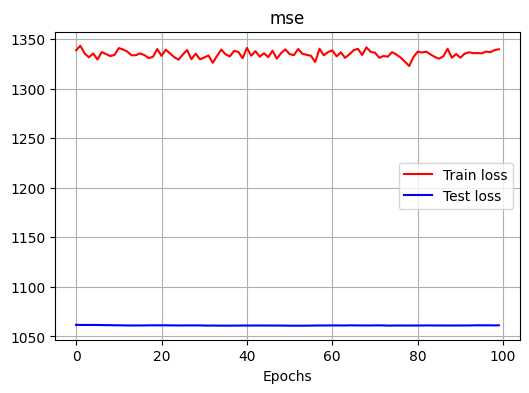

In [194]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']



plt.figure(figsize=(6,4))
plt.plot(train_loss, 'r', label='Train loss')
plt.plot(test_loss, 'b', label='Test loss')
plt.xlabel('Epochs')
plt.title('mse')
plt.legend()
plt.grid()

plt.show()


In [195]:
#load best weights
model.load_weights('/content/drive/MyDrive/cars_kertoimet2.weights.h5')

train_mae=model.evaluate(Xtrain_hat,ytrain,verbose=0)
test_mae=model.evaluate(Xtest_hat,ytest,verbose=0)
print(train_mae)
print(test_mae)

979.5413818359375
1060.8370361328125


In [196]:
#save the model
model.save('/content/drive/MyDrive/cars_model_v2.keras')

In [197]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/cars_model_v2.keras')
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 200)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

In [198]:
#predicted values for y
ytrain_pred=model.predict(Xtrain_hat)
print(ytrain_pred.shape)
ytest_pred=model.predict(Xtest_hat)
print(ytest_pred.shape)

1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(44048, 1)
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(18879, 1)


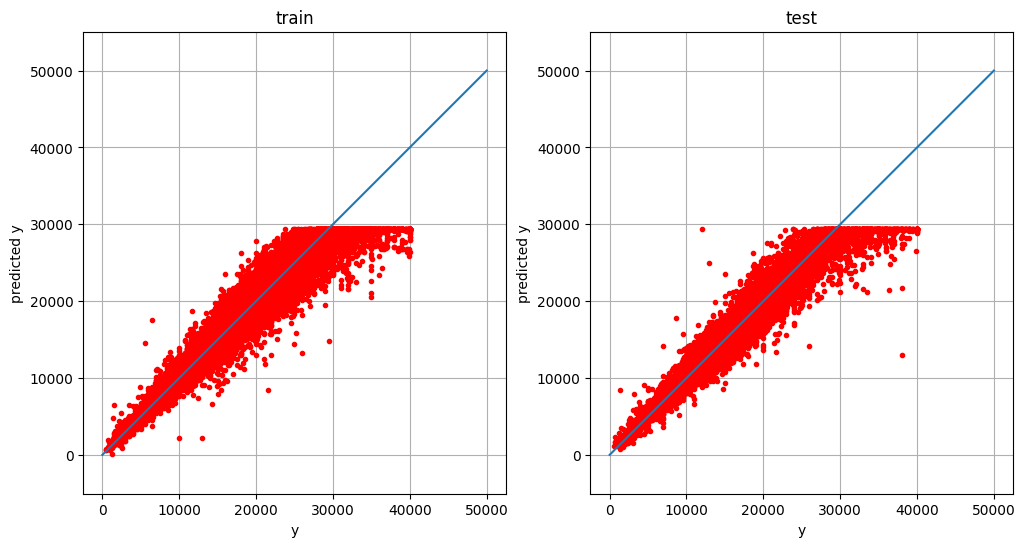

In [199]:
#y vs. predicted y

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(ytrain,ytrain_pred[:,0],'r.')
plt.plot([0,50000],[0,50000])
plt.title('train')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('predicted y')

plt.subplot(1,2,2)
plt.plot(ytest,ytest_pred[:,0],'r.')
plt.title('test')
plt.axis('equal')
plt.plot([0,50000],[0,50000])
plt.grid()
plt.xlabel('y')
plt.ylabel('predicted y')
plt.show()

In [200]:
model.predict(Xtest_hat[0].reshape((1,50)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[14866.426]], dtype=float32)

In [201]:
ytest[0]

16199

In [202]:
#test car
cat_columns=['model','transmission','fuelType','Manufacturer']
for col in cat_columns:
  names=df2[col].unique()
  print(names,'\n')


[' I10' ' Polo' ' 2 Series' ' Fiesta' ' Kuga' ' Tiguan' ' A Class' ' 1 Series' ' Golf' ' Corsa' ' Aygo' ' Tucson' ' A4' ' C Class' ' Yaris' ' Octavia' ' Astra' ' Focus' ' 3 Series' ' Q3' ' Insignia' ' A3' ' EcoSport' ' Fabia' ' Mokka X' ' E Class' ' 5 Series' ' A1'] 

['Manual' 'Semi-Auto' 'Automatic' 'Other'] 

['Petrol' 'Diesel' 'Hybrid' 'Other'] 

['hyundi' 'volkswagen' 'BMW' 'ford' 'merc' 'vauxhall' 'toyota' 'Audi' 'skoda'] 



In [203]:
xt_cat=np.array([1,0,0,1])

In [204]:
#one-hot encoding of categoricals
xt_cat_oh=np.zeros(45)
xt_cat_oh[xt_cat[0]]=1 #model = 28 coordinates, one 1, others = 0
xt_cat_oh[28+xt_cat[1]]=1 #transmission = 4 coordinates, one 1, others = 0
xt_cat_oh[32+xt_cat[2]]=1 #fuelType = 4 coordinates, one 1, others = 0
xt_cat_oh[36+xt_cat[3]]=1 #Manufacturer = 9 coordinates, one 1, others = 0


In [205]:
mu

array([ 2017.032, 23587.547,   112.429,    56.952,     1.548])

In [206]:
s

array([    2.001, 20436.677,    60.932,    12.877,     0.453])

In [207]:
mu=np.array([2017.032, 23587.547, 112.429, 56.952, 1.548])
s=np.array([2.001, 20436.677, 60.932, 12.877, 0.453])

xt_num=np.array([2012,10000,85,45,1.2])
xt_num_hat=(xt_num-mu)/s

In [208]:
xt=np.hstack((xt_cat_oh,xt_num_hat))
model.predict(xt.reshape(1,50))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


array([[7699.451]], dtype=float32)

## **Support, formula**




**EDIT (Enterprise DIgital Twin)-project at SeAMK**

Goal: to find a formula for the maximum stress in the support below with a given load

Data points
$x = [D1 ,D2 ,D3 ,R1 ,R2 ]$, $y$ = maximum stress

(calculated with CAD, when load is 1000)

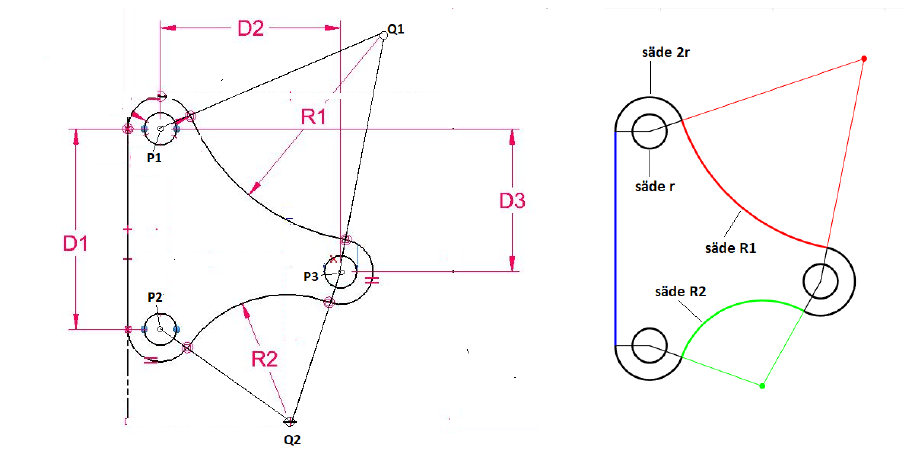

In [ ]:
#load edit_data.txt to colab
data=np.loadtxt('edit_data.txt')

#Data points from CAD

# 0  1  2  3  4  5     6       7     8
#D1 D2 D3 R1 R2 Force Stress Mass IsValid

#INPUTS:
#D1 = distance
#D2 = distance
#D3 = distance
#R1 = radius 1
#R2 = radius 2
#Force = load (= 1000)

#OUTPUTS:
#Stress = maximum stress
#Mass = mass of the support
#IsValid = is the support geometrically feasible

data.shape


(4471, 9)

In [ ]:
#data point k
np.set_printoptions(linewidth=100)
k=0
data[k,:]

array([5.e-02, 5.e-02, 0.e+00, 2.e-02, 2.e-02, 1.e+03, 0.e+00, 0.e+00, 0.e+00])

In [ ]:
#pick feasible geometries
valid=data[:,8]==1.0
X=data[valid,:]

x=X[:,0:5] #[D1,D2,D3,R1,R2]
y=X[:,6] #stresses

x.shape

(2869, 5)

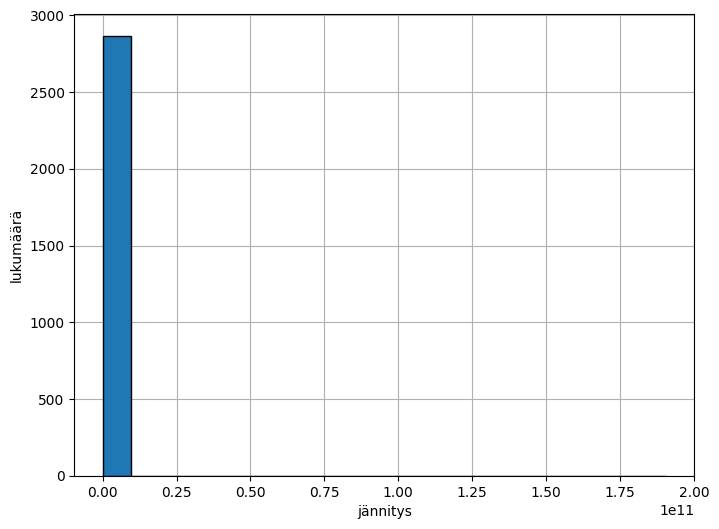

In [ ]:
#distribution of stresses
plt.figure(figsize=(8,6))
plt.hist(y,bins=20,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('stress')
plt.ylabel('number of datapoints')
plt.show()

In [ ]:
print(np.min(y))
print(np.max(y))
print(y[y>1e8].shape)
print(y[y<1e7].shape)


246.516313678037
190630494208.0
(169,)
(4,)


In [ ]:
#pick datapoints with stresses 1e7 ... 1e8
ehto=(y>=1e7)&(y<=1e8) #ehto = condition
y1=y[ehto]
x1=x[ehto,:]
x1.shape

(2696, 5)

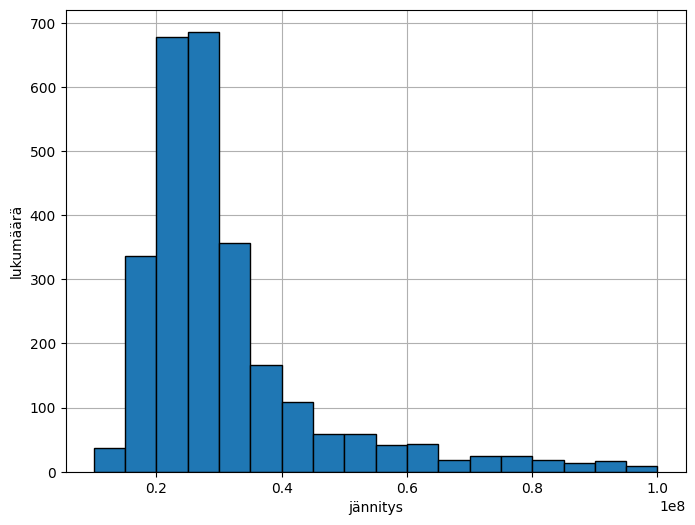

In [ ]:
#distribution of stresses
bins=np.linspace(0.1,1,19)*10**8
plt.figure(figsize=(8,6))
plt.hist(y1,bins=bins,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('stress')
plt.ylabel('number')
plt.show()

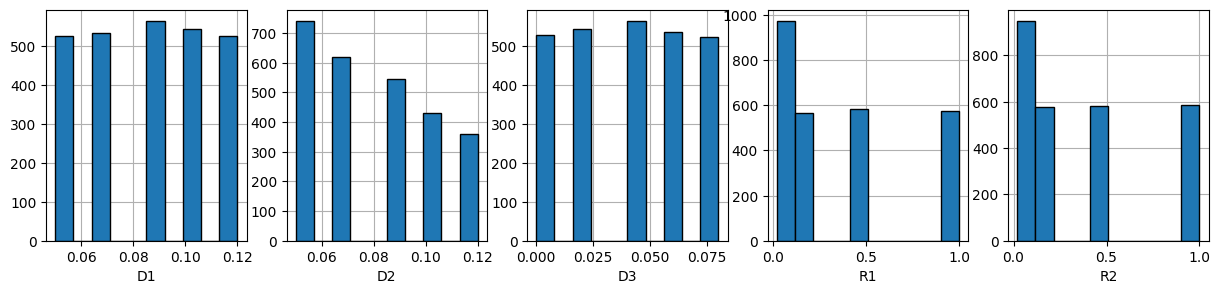

In [ ]:
#distribution of values of coordinates
nimet=['D1','D2','D3','R1','R2']
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.hist(x1[:,k],zorder=2,edgecolor='k')
  plt.grid()
  plt.xlabel(nimet[k])
plt.show()

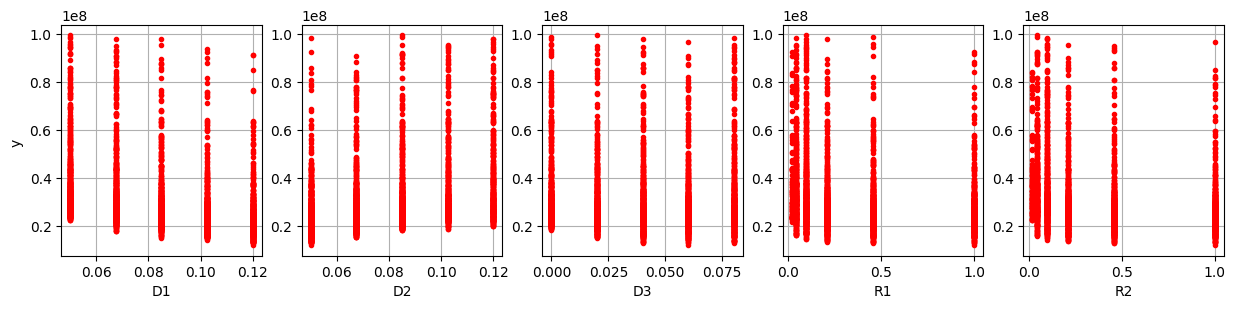

In [ ]:
#y vs. coordinates
nimet=['D1','D2','D3','R1','R2']
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.plot(x1[:,k],y1,'r.')
  plt.grid()
  plt.xlabel(nimet[k])
  if k==0:
    plt.ylabel('y ',)
plt.show()

In [ ]:
#training- and test-data (70/30)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3)
mtrain=xtrain.shape[0] #number of traing data points
mtest=xtest.shape[0] #number of test data points
print(mtrain)
print(mtest)

1887
809


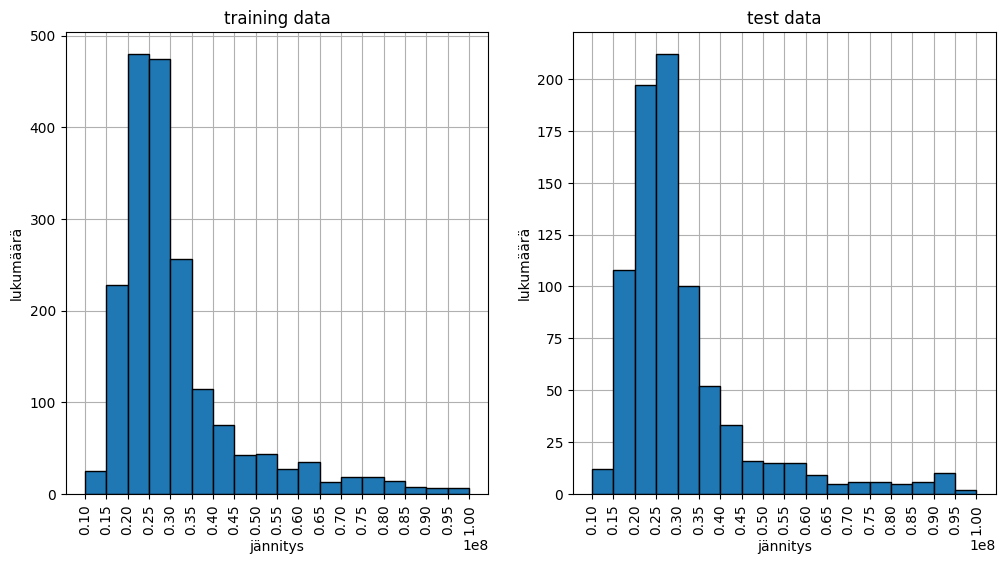

In [ ]:
#distribution of stresses
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(ytrain,bins=bins,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('jännitys') #stress
plt.ylabel('lukumäärä') #number of data points
plt.title('training data')
plt.xticks(bins,rotation=90)

plt.subplot(1,2,2)
plt.hist(ytest,bins=bins,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('jännitys')
plt.ylabel('lukumäärä')
plt.title('test data')
plt.xticks(bins,rotation=90)

plt.show()

In [ ]:
# scaling

mu=np.mean(xtrain,axis=0)
sigma=np.std(xtrain,axis=0)

xhat_train=(xtrain-mu)/sigma
yhat_train=ytrain/1e8

xhat_test=(xtest-mu)/sigma
yhat_test=ytest/1e8



In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dense, Dropout
from keras.api.optimizers import Adam
from keras.api.callbacks import ModelCheckpoint

In [ ]:
do_rate=0.3
model=Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=do_rate))
model.add(Dense(1))
model.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 512)               3072      
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 1)                 513       
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='mae',metrics='mse') #mae = mean average error

In [ ]:
checkpoint_filepath = 'edit_weights_v1.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

In [ ]:
history=model.fit(xhat_train,yhat_train,epochs=1000,batch_size=mtrain,
                  validation_data=(xhat_test,yhat_test),
                  callbacks=[model_checkpoint_callback])

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 0.0183 - mse: 0.0014
Epoch 1: val_loss improved from inf to 0.01674, saving model to edit_weights_v1.hdf5
1/1 [==============================] - 1s 1s/step - loss: 0.0183 - mse: 0.0014 - val_loss: 0.0167 - val_mse: 0.0011
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.0184 - mse: 0.0015
Epoch 2: val_loss did not improve from 0.01674
1/1 [==============================] - 0s 98ms/step - loss: 0.0184 - mse: 0.0015 - val_loss: 0.0168 - val_mse: 0.0011
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.0177 - mse: 0.0013
Epoch 3: val_loss did not improve from 0.01674
1/1 [==============================] - 0s 93ms/step - loss: 0.0177 - mse: 0.0013 - val_loss: 0.0168 - val_mse: 0.0011
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 0.0180 - mse: 0.0015
Epoch 4: val_loss did not improve from 0.01674
1/1 [==============================] - 0s 95ms/step - loss: 0.0180

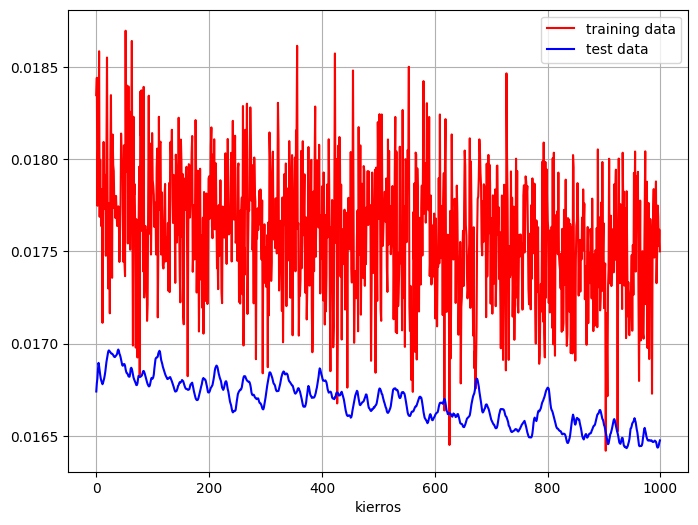

In [ ]:
cost=history.history['loss']
val_cost=history.history['val_loss']

plt.figure(figsize=(8,6))
plt.plot(cost,'r',label='training data')
plt.plot(val_cost,'b',label='test data')
plt.grid()
plt.xlabel('kierros')
plt.legend()
plt.show()

In [ ]:
#load best weights
model.load_weights('edit_weights_v1.weights.h5')
mse_train,mae_train=model.evaluate(xhat_train,yhat_train)
mse_test,mae_test=model.evaluate(xhat_test,yhat_test)

26/26 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0010


In [ ]:
#predictions
ytrain_pred=model.predict(xhat_train)
ytest_pred=model.predict(xhat_test)
print(ytrain_pred.shape)
print(ytest_pred.shape)

26/26 [==============================] - 0s 1ms/step
(1887, 1)
(809, 1)


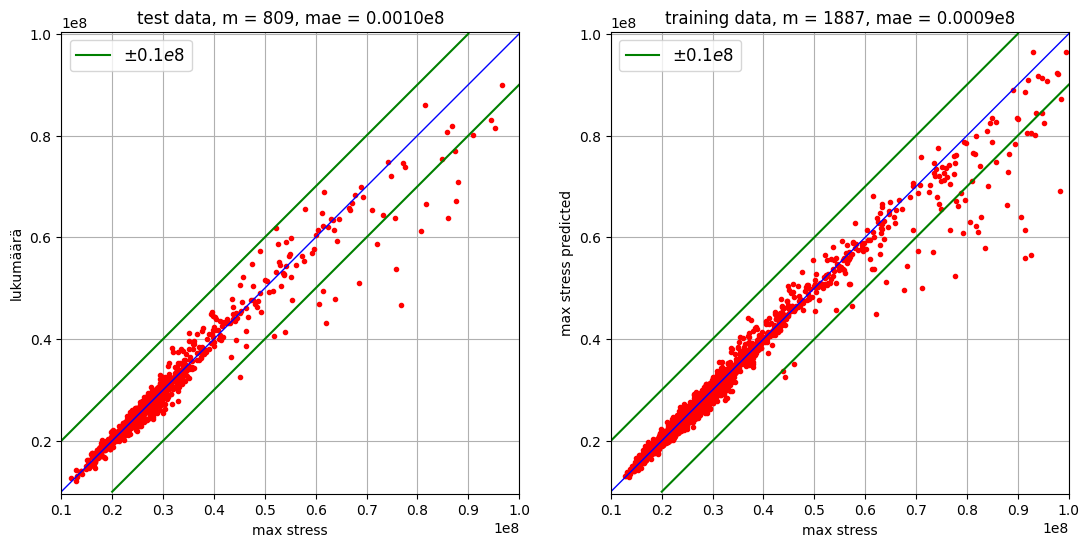

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.plot(ytest,ytest_pred[:,0]*1e8,'r.')
plt.plot([0.1e8,0.9e8],[0.2e8,1e8],'g',label=r'$\pm 0.1e8$')
plt.plot([0.2e8,1e8],[0.1e8,0.9e8],'g')
plt.grid()
plt.axis('equal')
plt.plot([0.1e8,1e8],[0.1e8,1e8],'b',linewidth=1)
plt.legend(fontsize=12)
plt.title('test data, m = '+str(mtest)+', mae = {:.4f}'.format(mae_test)+'e8')
plt.xlabel('max stress')
plt.ylabel('max stress predicted')
plt.xlim([0.1e8,1e8])
plt.ylabel('lukumäärä')
plt.ylim([0.1e8,1e8])
plt.xticks(np.linspace(0.1,1,10)*1e8)

plt.subplot(1,2,2)
plt.plot(ytrain,ytrain_pred[:,0]*1e8,'r.')
plt.plot([0.1e8,0.9e8],[0.2e8,1e8],'g',label=r'$\pm 0.1e8$')
plt.plot([0.2e8,1e8],[0.1e8,0.9e8],'g')
plt.plot([0.1e8,1e8],[0.1e8,1e8],'b',linewidth=1)
plt.grid()
plt.axis('equal')
plt.legend(fontsize=12)
plt.title('training data, m = '+str(mtrain)+', mae = {:.4f}'.format(mae_train)+'e8')
plt.xlabel('max stress')
plt.ylabel('max stress predicted')
plt.xlim([0.1e8,1e8])
plt.ylim([0.1e8,1e8])
plt.xticks(np.linspace(0.1,1,10)*1e8)
plt.show()

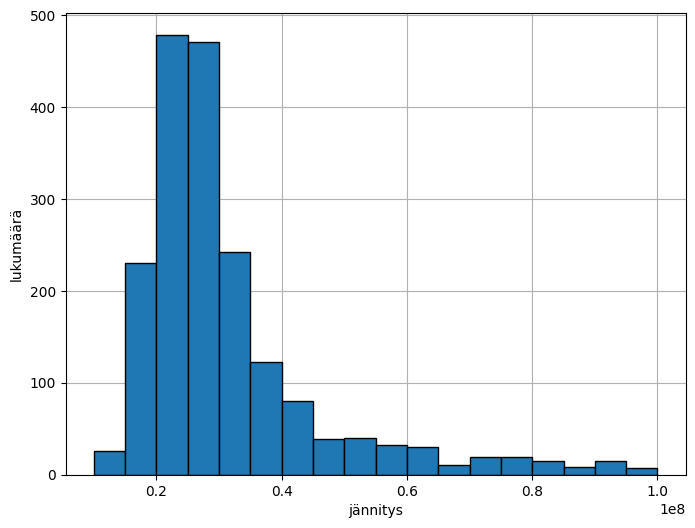

In [ ]:
#distribution of training stresses
plt.figure(figsize=(8,6))
plt.hist(ytrain,bins=bins,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('jännitys')
plt.ylabel('lukumäärä')
plt.show()

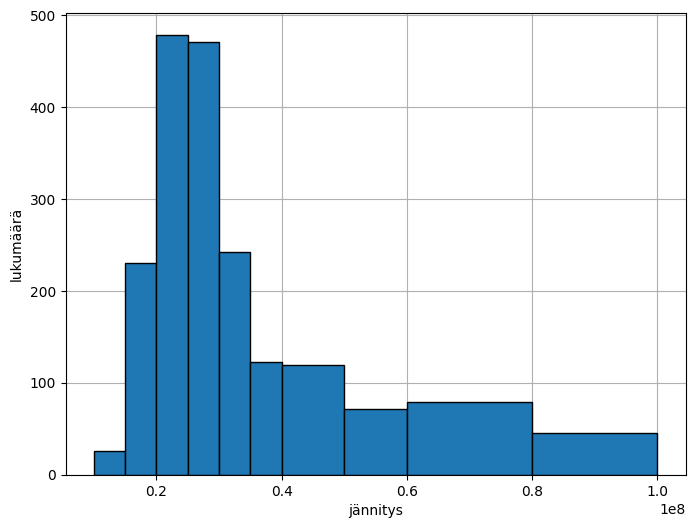

In [ ]:
#distribution of training stresses v2
bin_edges=np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.8,1])*1e8
#bin_edges=np.linspace(0.1,1,19)*1e8
plt.figure(figsize=(8,6))
plt.hist(ytrain,bins=bin_edges,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('jännitys')
plt.ylabel('lukumäärä')
plt.show()

In [ ]:
#number of bin edges
mbins=bin_edges.shape[0]
mbins

11

In [ ]:
#make the distribution more uniform by copying datapoints
lkm=np.histogram(ytrain,bins=bin_edges)[0] #lkm = lukumäärä = number of
#lkm = number of datapoints on the intervals
y2=ytrain
x2=xtrain
#m2,n2=x2.shape

nmax=np.max(lkm)

for k in range(mbins-1):
    if k<=mbins-3: #until the last interval
      valik=(ytrain>=bin_edges[k]) & (ytrain<bin_edges[k+1]) #väli = interval
    else: #last interval
      valik=(ytrain>=bin_edges[k]) & (ytrain<=bin_edges[k+1])

    #datapoints on the interval k
    x2k=xtrain[valik,:]
    y2k=ytrain[valik]
    #copy datapoints until their number is nmax
    for n in range(nmax-lkm[k]):
        nk=n%lkm[k] #remainder of n/lkm[k]
        x2=np.vstack((x2,x2k[nk]))
        y2=np.hstack((y2,y2k[nk]))

In [ ]:
#original number of datapoint on the intervals
lkm

array([ 26, 230, 479, 471, 243, 123, 119,  72,  79,  45])

In [ ]:
#number of datapoints on the intervals after copying
lkm2=np.histogram(y2,bins=bin_edges)[0]
lkm2

array([479, 479, 479, 479, 479, 479, 479, 479, 479, 479])

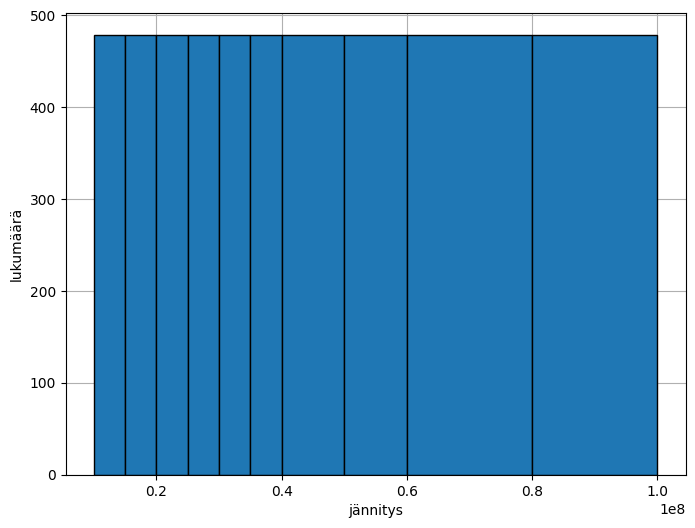

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(y2,bins=bin_edges,zorder=2,edgecolor='k')
plt.grid()
plt.xlabel('jännitys')
plt.ylabel('lukumäärä')
plt.show()

In [ ]:
print(x2.shape)
print(y2.shape)
m2train=x2.shape[0]

(4790, 5)
(4790,)


In [ ]:

mu2=np.mean(x2,axis=0)
sigma2=np.std(x2,axis=0)

x2hat_train=(x2-mu2)/sigma2
y2hat_train=y2/1e8

xhat_train=(xtrain-mu2)/sigma2
yhat_train=ytrain/1e8

xhat_test=(xtest-mu2)/sigma2
yhat_test=ytest/1e8


In [ ]:
mu2
#mu=np.([0.0833585 , 0.08066   , 0.042344  , 0.33935021, 0.34591161])

array([0.082738517745304, 0.080772964509397, 0.042070981210858, 0.341322611081037,
       0.340685357025158])

In [ ]:
sigma2
#sigma=np.array([0.02618109, 0.02525885, 0.02846938, 0.33678532, 0.34860539])

array([0.026041544789151, 0.025486321391274, 0.02845006564411 , 0.341649967523758,
       0.340502475850241])

In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dense, Dropout
from keras.api.optimizers import Adam
from keras.api.callbacks import ModelCheckpoint

In [ ]:
do_rate=0.25
model=Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=do_rate))
model.add(Dense(1))
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               3072      
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 1)                 513       
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#learning_ratea 0.01, until val_loss is about 0.015),
#then 0.001, 0.0001, ... (change when val_loss doesn't decrease any more)
#i.e model.compile -> model.fit -> model.compile -> model.fit ...

model.compile(optimizer=Adam(learning_rate=0.0001),loss='mae',metrics='mse')

In [ ]:
callback = ModelCheckpoint(
    filepath='edit_weights.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

In [ ]:
history=model.fit(x2hat_train,y2hat_train,epochs=1000,batch_size=m2train,
                  validation_data=(xhat_test,yhat_test),
                  callbacks=callback)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 0.0185 - mse: 8.6932e-04
Epoch 1: val_loss did not improve from 0.01231
1/1 [==============================] - 1s 796ms/step - loss: 0.0185 - mse: 8.6932e-04 - val_loss: 0.0126 - val_mse: 3.3783e-04
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.0183 - mse: 8.4381e-04
Epoch 2: val_loss did not improve from 0.01231
1/1 [==============================] - 0s 69ms/step - loss: 0.0183 - mse: 8.4381e-04 - val_loss: 0.0126 - val_mse: 3.4115e-04
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.0181 - mse: 7.7924e-04
Epoch 3: val_loss did not improve from 0.01231
1/1 [==============================] - 0s 94ms/step - loss: 0.0181 - mse: 7.7924e-04 - val_loss: 0.0126 - val_mse: 3.4378e-04
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 0.0182 - mse: 8.2906e-04
Epoch 4: val_loss did not improve from 0.01231
1/1 [==============================] - 0s 74ms/step - loss: 0

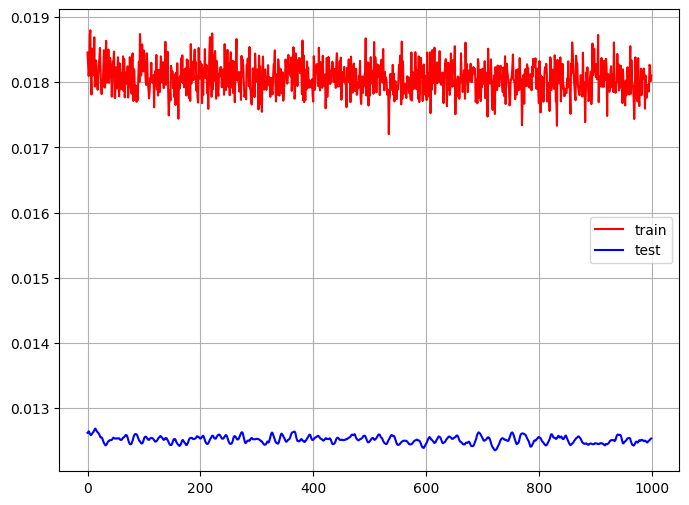

In [ ]:
#kustannusten (mse) kuvaajat
cost=history.history['loss']
val_cost=history.history['val_loss']

plt.figure(figsize=(8,6))
plt.plot(cost,'r',label='train')
plt.plot(val_cost,'b',label='test')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#load best coefficients

model.load_weights('edit_weights.weights.h5')
mae_train,mse_train=model.evaluate(xhat_train,yhat_train)
mae_test,mse_test=model.evaluate(xhat_test,yhat_test)
print(mae_train)
print(mae_test)

26/26 [==============================] - 0s 2ms/step - loss: 0.0123 - mse: 3.2413e-04
0.0092421043664217
0.012311598286032677


In [ ]:
#predictions
ytrain_pred=model.predict(xhat_train)
ytest_pred=model.predict(xhat_test)
print(ytrain_pred.shape)
print(ytest_pred.shape)

26/26 [==============================] - 0s 2ms/step
(1887, 1)
(809, 1)


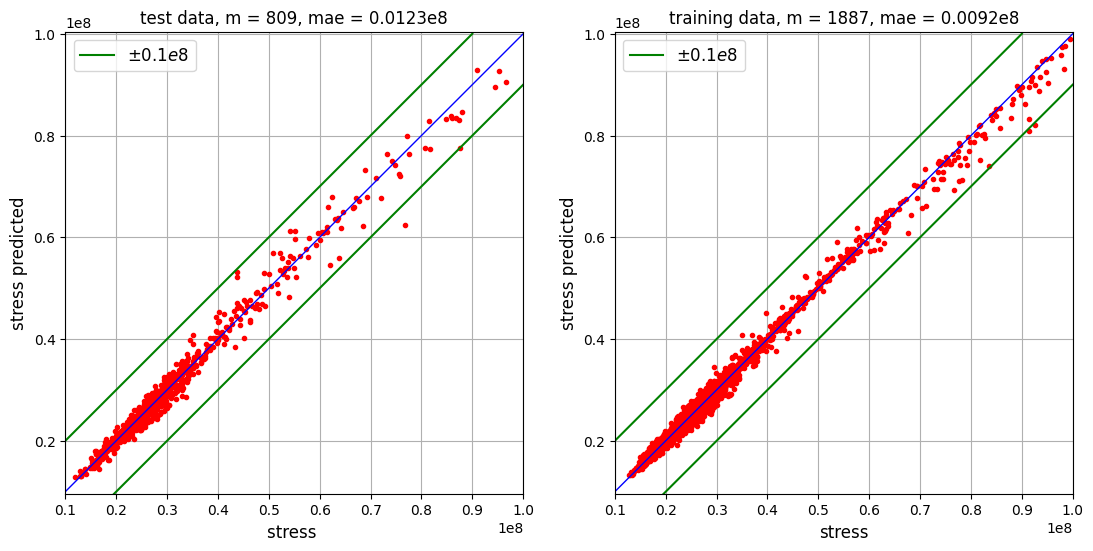

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.plot(ytest,ytest_pred[:,0]*1e8,'r.')
plt.plot([0,0.9e8],[0.1e8,1e8],'g',label=r'$\pm 0.1e8$')
plt.plot([0.1e8,1e8],[0,0.9e8],'g')
plt.grid()
plt.axis('equal')
plt.plot([0,1e8],[0,1e8],'b',linewidth=1)
plt.legend(fontsize=12)
plt.title('test data, m = '+str(mtest)+', mae = {:.4f}'.format(mae_test)+'e8',fontsize=12)
plt.xlabel('stress ',fontsize=12)
plt.ylabel('stress predicted',fontsize=12)
plt.xlim([0.1e8,1e8])
plt.ylim([0.1e8,1e8])
plt.xticks(np.linspace(0.1,1,10)*1e8)

plt.subplot(1,2,2)
plt.plot(ytrain,ytrain_pred[:,0]*1e8,'r.')
plt.plot([0,0.9e8],[0.1e8,1e8],'g',label=r'$\pm 0.1e8$')
plt.plot([0.1e8,1e8],[0,0.9e8],'g')
plt.grid()
plt.axis('equal')
plt.plot([0,1e8],[0,1e8],'b',linewidth=1)
plt.legend(fontsize=12)
plt.title('training data, m = '+str(mtrain)+', mae = {:.4f}'.format(mae_train)+'e8',fontsize=12)
plt.xlabel('stress',fontsize=12)
plt.ylabel('stress predicted',fontsize=12)
plt.xlim([0.1e8,1e8])
plt.ylim([0.1e8,1e8])
plt.xticks(np.linspace(0.1,1,10)*1e8)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#coefficients
weights = model.get_weights()
w1=weights[0]
b1=weights[1]
w2=weights[2]
b2=weights[3]

In [ ]:
w1.shape

(5, 512)

In [ ]:
#save coefficients and mean mu and std s
np.savetxt('/content/drive/MyDrive/w1.txt',w1)
np.savetxt('/content/drive/MyDrive/b1.txt',b1)
np.savetxt('/content/drive/MyDrive/w2.txt',w2)
np.savetxt('/content/drive/MyDrive/b2.txt',b2)
np.savetxt('/content/drive/MyDrive/mu.txt',mu2)
np.savetxt('/content/drive/MyDrive/sigma.txt',sigma2)

## **Support, optimization**

Given $D1,D2,D3$, load
 $F$ and maximum stress allowed.

Find support (i.e radii $R1$  and $R2$) with minimum area and predicted maximum stress below the maximum allowed



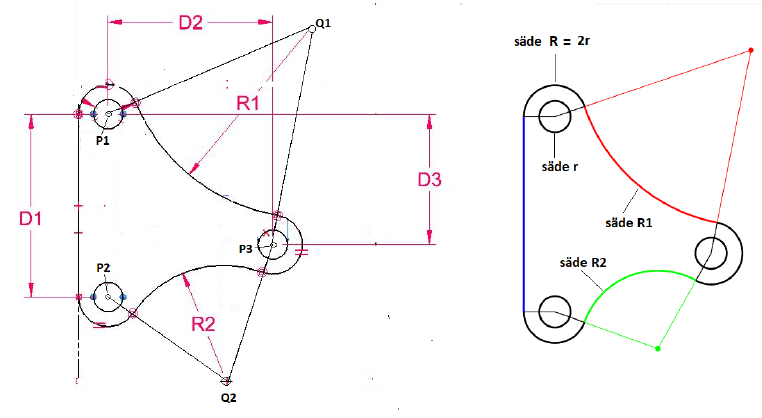

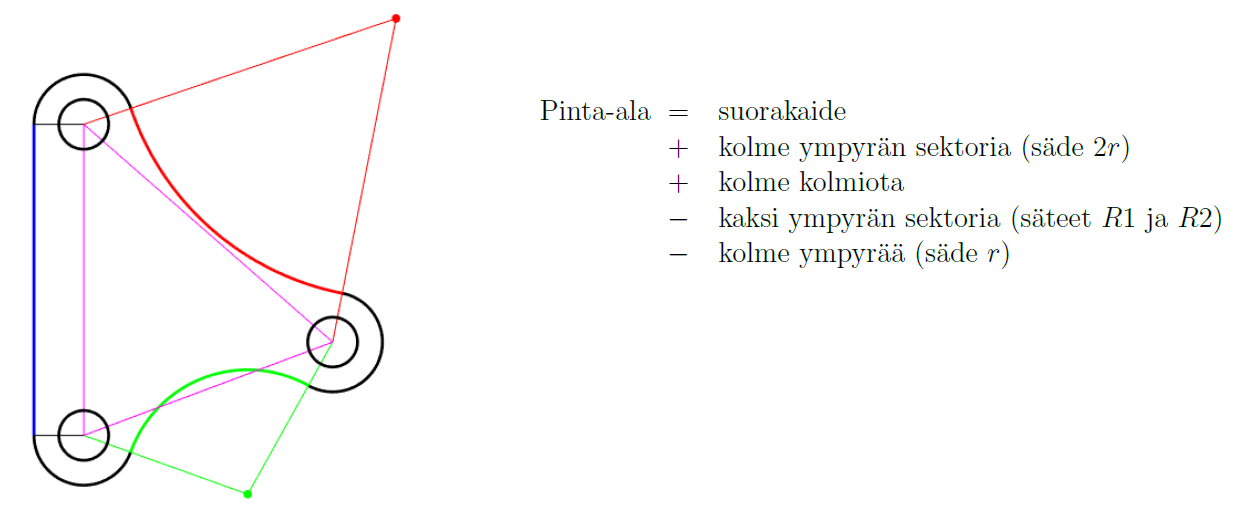

$$A=(R_1^2-R^2)\arccos\left(\frac{\sqrt{D_2^2 + D_3^2}}{2(R + R_1)}\right)$$

$$+(R_2^2-R^2)\arccos\left(\frac{\sqrt{D_2^2 + (D_1 - D_3)^2}}{2(R + R_2)}\right)$$

$$+\sqrt{D_2^2 + D_3^2}\sqrt{4(R +  R_1)^2- D_2^2 - D_3^2 }/4$$

$$+ \sqrt{D_2^2 + (D_1 - D_3)^2}\sqrt{4(R + R_2)^2 - D_2^2 - (D_1 - D_3)^2}/4 $$

$$+ 2\pi R^2 - \pi R_1^2/2 - \pi R_2^2/2 - 3\pi r^2 + D_1D_2/2+ D_1 R$$

In [ ]:
from sympy import symbols,acos,pi,sqrt,simplify
D1,D2,D3,R1,R2,r,R=symbols('D1,D2,D3,R1,R2,r,R')

#distances
p1p3=sqrt(D2**2+D3**2)
p2p3=sqrt(D2**2+(D1-D3)**2)
p1p2=D1
p1q1=R1+R
p3q1=p1q1
p2q2=R2+R
p3q2=p2q2
#suorakaide
A1=D1*R
#kolmio p1p2p3
A2=1/2*D1*D2
kp2p1p3=acos((p1p2**2+p1p3**2-p2p3**2)/(2*p1p2*p1p3))
kp1p2p3=acos((p1p2**2+p2p3**2-p1p3**2)/(2*p1p2*p2p3))
kp1p3p2=pi-kp2p1p3-kp1p2p3
#kolmio p1q1p3
A3=1/2*p1p3*sqrt(p1q1**2-(p1p3/2)**2)
kq1p1p3=acos((p1p3/2)/p1q1)
kq1p3p1=kq1p1p3
kp1q1p3=pi-kq1p1p3-kq1p3p1
#kolmio p2q2p3
A4=1/2*p2p3*sqrt(p2q2**2-(p2p3/2)**2)
kq2p2p3=acos((p2p3/2)/p2q2)
kq2p3p2=kq2p2p3
kp2q2p3=pi-kq2p2p3-kq2p3p2
#sektori p1
kp1=2*pi-(pi/2+kp2p1p3+kq1p1p3)
A5=1/2*kp1*R**2
#sektori p2
kp2=2*pi-(pi/2+kp1p2p3+kq2p2p3)
A6=1/2*kp2*R**2
#sektori p3
kp3=2*pi-(kq1p3p1+kp1p3p2+kq2p3p2)
A7=1/2*kp3*R**2
#sektori q1
kq1=kp1q1p3
A8=1/2*kq1*R1**2
#sektori q2
kq2=kp2q2p3
A9=1/2*kq2*R2**2
#reiät
A10=3*pi*r**2

A=A1+A2+A3+A4+A5+A6+A7-A8-A9-A10
simplify(A)

0.5*D1*D2 + 1.0*D1*R - 1.0*R**2*acos(sqrt(D2**2 + D3**2)/(2*(R + R1))) - 1.0*R**2*acos(sqrt(D1**2 - 2*D1*D3 + D2**2 + D3**2)/(2*(R + R2))) + 2.0*pi*R**2 + 1.0*R1**2*acos(sqrt(D2**2 + D3**2)/(2*(R + R1))) - 0.5*pi*R1**2 + 1.0*R2**2*acos(sqrt(D1**2 - 2*D1*D3 + D2**2 + D3**2)/(2*(R + R2))) - 0.5*pi*R2**2 - 3.0*pi*r**2 + 0.25*sqrt(D2**2 + D3**2)*sqrt(-D2**2 - D3**2 + 4*R**2 + 8*R*R1 + 4*R1**2) + 0.25*sqrt(D1**2 - 2*D1*D3 + D2**2 + D3**2)*sqrt(-D1**2 + 2*D1*D3 - D2**2 - D3**2 + 4*R**2 + 8*R*R2 + 4*R2**2)

In [ ]:
#%% load edit_data.txt to colab
X=np.loadtxt('edit_data.txt')

# 0  1  2  3  4  5     6       7     8
#D1 D2 D3 R1 R2 Force Stress Mass IsValid
#
#INPUTS:
#D1 = Reikien etäisyys
#D2 = Reikien etäisyys
#D3 = Reikien etäisyys
#R1 = Säde 1
#R2 = Säde 2
#Force = Voima jolla kappaletta kuormitetaan alaspäin = 1000

#OUTPUTS:
#Stress = Syntynyt jännitys
#Mass = Kappaleen massa
#IsValid = Ovatko mitat validit(synnyttää järkevän geometrian)
X.shape

(4471, 9)

In [ ]:
valid=X[:,8]==1.0 #datapisteet, joiden geometria on validi
Xvalid=X[valid,:]
x=Xvalid[:,0:5] #[D1,D2,D3,R1,R2]
y=Xvalid[:,6] #max jännitys
x.shape

(2869, 5)

In [ ]:
#poimitaan datapisteet, joiden jännitys välillä 1e7 ... 1e8
ehto=(y>=1e7)&(y<=1e8)
x1=x[ehto,:]
y1=y[ehto]
m1,n1=x1.shape
m1

2696

In [ ]:
#load w1.txt,b1.txt,w2.txt,b2.txt,mu.txt,sigma.txt to colab
w1=np.loadtxt('w1.txt')
b1=np.loadtxt('b1.txt')
w2=np.loadtxt('w2.txt')
b2=np.loadtxt('b2.txt')
mu=np.loadtxt('mu.txt')
sigma=np.loadtxt('sigma.txt')

In [ ]:
#or read from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
w1=np.loadtxt('/content/drive/MyDrive/w1.txt')
b1=np.loadtxt('/content/drive/MyDrive/b1.txt')
w2=np.loadtxt('/content/drive/MyDrive/w2.txt')
b2=np.loadtxt('/content/drive/MyDrive/b2.txt')
mu=np.loadtxt('/content/drive/MyDrive/mu.txt')
sigma=np.loadtxt('/content/drive/MyDrive/sigma.txt')

In [ ]:
b1.shape

(512,)

In [ ]:
mu

array([0.083, 0.081, 0.042, 0.341, 0.341])

In [ ]:
sigma

array([0.026, 0.025, 0.028, 0.342, 0.341])

In [ ]:
#predictions
xhat=(x1-mu)/sigma
zz1=xhat@w1+b1
yy1=np.maximum(zz1,0) #'relu'
yy2=yy1@w2+b2
y1pred=yy2*1e8
mae=np.sum(np.abs(y1-y1pred))/m1
mae/1e8

0.010163182435801162

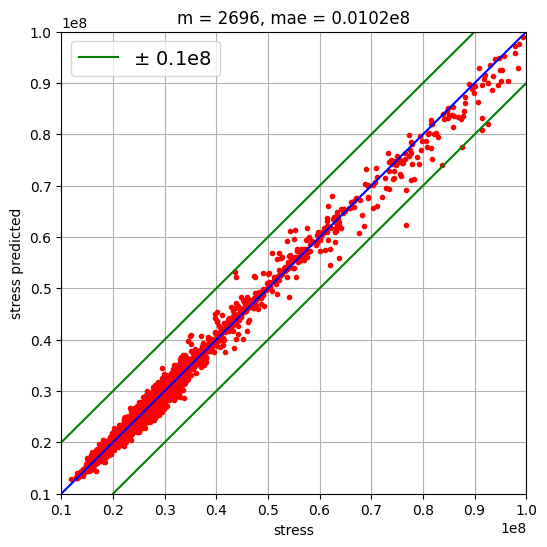

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y1,y1pred,'r.',markersize=6)
plt.plot([0.1e8,1e8],[0.1e8,1e8],'b')
plt.plot([0.2e8,1e8],[0.1e8,0.9e8],'g',label=r'$\pm$ 0.1e8')
plt.plot([0.1e8,0.9e8],[0.2e8,1e8],'g')
plt.grid()
plt.title('m = '+str(m1)+', mae = {:.4f}'.format(mae/1e8)+'e8')
plt.legend(fontsize=14)
plt.xlabel('stress')
plt.ylabel('stress predicted')
plt.xlim([0.1e8,1e8])
plt.ylim([0.1e8,1e8])
plt.show()

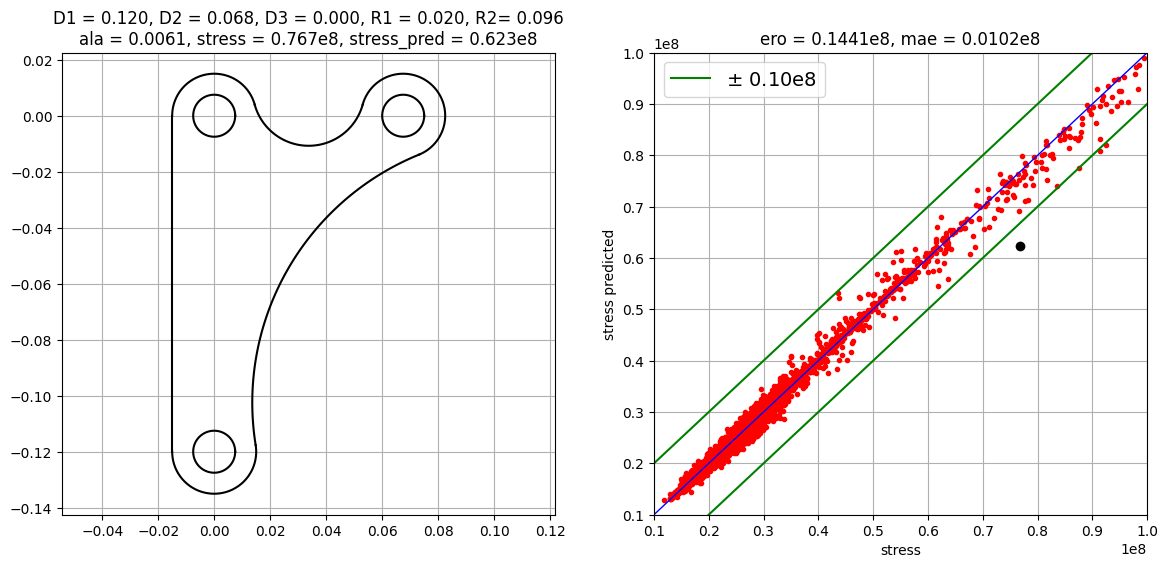

In [ ]:
#picture of a support and it's area
k=np.random.randint(0,m1)
k=np.argmax(np.abs(y1-y1pred)) #largest difference |y1-y1pred|
#ks=np.argsort(np.abs(y1-y1pred))#smallest -> largest
#k=ks[-2]
#k=ks[0]

xk=x1[k,:]
yk=y1[k]
yk_pred=y1pred[k]

D1=xk[0]
D2=xk[1]
D3=xk[2]
R1=xk[3]
R2=xk[4]




r=0.0075
R=2*r

#coordinates
p1x=0
p1y=0
p2x=0
p2y=-D1
p3x=D2
p3y=-D3

#reikien ympyrät
kk=np.linspace(0,2*np.pi,100)
rP1x=p1x+r*np.cos(kk)
rP1y=p1y+r*np.sin(kk)
rP2x=p2x+r*np.cos(kk)
rP2y=p2y+r*np.sin(kk)
rP3x=p3x+r*np.cos(kk)
rP3y=p3y+r*np.sin(kk)

#piste q1
k_p1p3=np.arctan2(p3y-p1y,p3x-p1x) #P1P3:n suuntakulma
kp_p1p3x=(p1x+p3x)/2 #P1P3:n keskipiste
kp_p1p3y=(p1y+p3y)/2
p1q1=R+R1
p1p3=np.sqrt((p3x-p1x)**2+(p3y-p1y)**2)
L1=np.sqrt(p1q1**2-(p1p3/2)**2) #etäisyys Q1->P1P3
q1x=kp_p1p3x+L1*np.cos(k_p1p3+np.pi/2)
q1y=kp_p1p3y+L1*np.sin(k_p1p3+np.pi/2)

#piste q2
k_p2p3=np.arctan2(p3y-p2y,p3x-p2x) #P2P3:n suuntakulma
kp_p2p3x=(p2x+p3x)/2 #P1P3:n keskipiste
kp_p2p3y=(p2y+p3y)/2
p2q2=R+R2
p2p3=np.sqrt((p3x-p2x)**2+(p3y-p2y)**2)
L2=np.sqrt(p2q2**2-(p2p3/2)**2) #etäisyys Q2->P2P3
q2x=kp_p2p3x+L2*np.cos(k_p2p3-np.pi/2)
q2y=kp_p2p3y+L2*np.sin(k_p2p3-np.pi/2)

#sektori P1
k_p1q1=np.arctan2(q1y-p1y,q1x-p1x)
k1=np.linspace(k_p1q1,np.pi,100)
sP1x=p1x+R*np.cos(k1)
sP1y=p1y+R*np.sin(k1)

#sektori P2
k_p2q2=np.arctan2(q2y-p2y,q2x-p2x)
k2=np.linspace(k_p2q2,-np.pi,100)
sP2x=p2x+R*np.cos(k2)
sP2y=p2y+R*np.sin(k2)

#sektori P3
p3q1=np.sqrt((q1x-p3x)**2+(q1y-p3y)**2)
k_p1p3q1=np.arccos((p1p3**2+p3q1**2-p1q1**2)/(2*p1p3*p3q1))
p1p2=D1
k_p1p3p2=np.arccos((p1p3**2+p2p3**2-p1p2**2)/(2*p1p3*p2p3))
p3q2=p2q2
k_p2p3q2=np.arccos((p2p3**2+p3q2**2-p2q2**2)/(2*p2p3*p3q2))
ksP3=2*np.pi-k_p1p3q1-k_p1p3p2-k_p2p3q2
k_p3q1=np.arctan2(q1y-p3y,q1x-p3x)
k3=np.linspace(k_p3q1,k_p3q1-ksP3,100)
sP3x=p3x+R*np.cos(k3)
sP3y=p3y+R*np.sin(k3)

#sektori Q1
k_q1p1=np.arctan2(p1y-q1y,p1x-q1x)
ksQ1=np.arccos((p1q1**2+p3q1**2-p1p3**2)/(2*p1q1*p3q1))
k4=np.linspace(k_q1p1,k_q1p1+ksQ1,100)
sQ1x=q1x+R1*np.cos(k4)
sQ1y=q1y+R1*np.sin(k4)

#sektori Q2
k_q2p2=np.arctan2(p2y-q2y,p2x-q2x)
ksQ2=np.arccos((p2q2**2+p3q2**2-p2p3**2)/(2*p2q2*p3q2))
k5=np.linspace(k_q2p2,k_q2p2-ksQ2,100)
sQ2x=q2x+R2*np.cos(k5)
sQ2y=q2y+R2*np.sin(k5)

#kannattimen pinta-ala
A=((R1**2-R**2)*np.arccos(np.sqrt(D2**2 + D3**2)/(2*(R + R1)))
+(R2**2-R**2)*np.arccos(np.sqrt(D2**2 + (D1 - D3)**2)/(2*(R + R2)))
+ np.sqrt(D2**2 + D3**2)*np.sqrt(- D2**2 - D3**2 + 4*R**2 + 8*R*R1 + 4*R1**2)/4
+ np.sqrt(D2**2 + (D1 - D3)**2)*np.sqrt(4*(R + R2)**2 - D2**2 - (D1 - D3)**2)/4
+ 2*np.pi*R**2 - (np.pi*R1**2)/2 - (np.pi*R2**2)/2 - 3*np.pi*r**2 + (D1*D2)/2 + D1*R)


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(rP1x,rP1y,'k')
plt.plot(rP2x,rP2y,'k')
plt.plot(rP3x,rP3y,'k')
plt.plot(sP1x,sP1y,'k')
plt.plot(sP2x,sP2y,'k')
plt.plot(sP3x,sP3y,'k')
plt.plot(sQ1x,sQ1y,'k')
plt.plot(sQ2x,sQ2y,'k')
plt.plot([p1x-R,p2x-R],[p1y,p2y],'k')
plt.grid()
plt.axis('equal')
plt.title('D1 = {:.3f}'.format(D1)+\
          ', D2 = {:.3f}'.format(D2)+\
          ', D3 = {:.3f}'.format(D3)+\
          ', R1 = {:.3f}'.format(R1)+', R2= {:.3f}\n'.format(R2)+
          'ala = {:.4f}'.format(A)+', stress = {:.3f}'.format(yk/1e8)+'e8'+
          ', stress_pred = {:.3f}'.format(yk_pred/1e8)+'e8')
plt.subplot(1,2,2)
plt.plot(y1,y1pred,'r.',markersize=6)
plt.plot([1e7,10e7],[1e7,10e7],'b',lw=1)
plt.plot([1e7,9e7],[2e7,10e7],'g',label=r'$\pm$ 0.10e8')
plt.plot([2e7,10e7],[1e7,9e7],'g')
plt.plot(yk,yk_pred,'ko')
plt.grid()
plt.title('ero = {:.4f}'.format((yk-yk_pred)/1e8)+'e8, mae = {:.4f}'.format(mae/1e8)+'e8')
plt.legend(fontsize=14)
plt.xlabel('stress')
plt.ylabel('stress predicted')
plt.xlim([1e7,1e8])
plt.ylim([1e7,1e8])
plt.show()


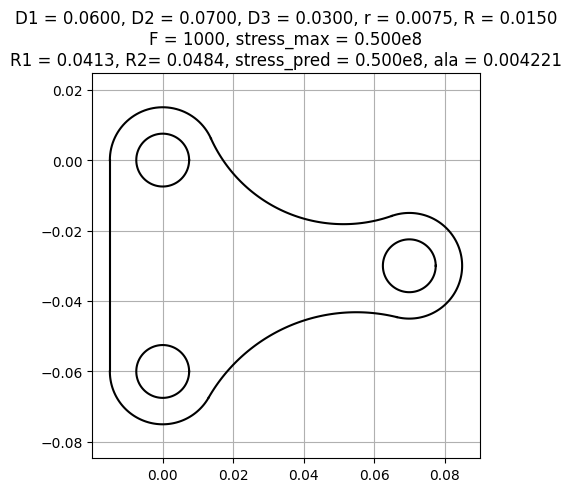

2.5799412727355957


In [ ]:
#find R1 and R2 such that stress is below stress_max and the area is smallest

import time
t=time.time()

#mitat
D1=0.06
D2=0.07
D3=0.03
r=0.0075
R=2*r
F=1000 #kuormittava voima
stress_max=0.5e8 #maksimijännitys

#reikien koordinaatit
p1x=0
p1y=0
p2x=0
p2y=-D1
p3x=D2
p3y=-D3

#etäisyydet
p1p3=np.sqrt((p3x-p1x)**2+(p3y-p1y)**2)
p2p3=np.sqrt((p3x-p2x)**2+(p3y-p2y)**2)
p1p2=np.sqrt((p2x-p1x)**2+(p2y-p1y)**2)


#minimum values for R1 and R2
R1min=p1p3/2-R+1e-7
R2min=p2p3/2-R+1e-7

#max values (smaller max-values -> more dense grid)
R1max=1
R2max=1

#number of grid-points
N1=500
N2=500
N=N1*N2



#values for  R1 and R2

#normal scale
#RR1=np.linspace(R1min,R1max,N1)
#RR2=np.linspace(R2min,R2max,N2)

#logaritmic scale (more small values)
RR1=np.logspace(np.log10(R1min),np.log10(R1max),N1)
RR2=np.logspace(np.log10(R2min),np.log10(R2max),N2)

#grid-points (N1xN2-matrices)
R11,R22=np.meshgrid(RR1,RR2)

#to 1D-arrays
R1=R11.reshape(N)
R2=R22.reshape(N)

#areas
A=((R1**2-R**2)*np.arccos(np.sqrt(D2**2 + D3**2)/(2*(R + R1)))
+(R2**2-R**2)*np.arccos(np.sqrt(D2**2 + (D1 - D3)**2)/(2*(R + R2)))
+ np.sqrt(D2**2 + D3**2)*np.sqrt(- D2**2 - D3**2 + 4*R**2 + 8*R*R1 + 4*R1**2)/4
+ np.sqrt(D2**2 + (D1 - D3)**2)*np.sqrt(4*(R + R2)**2 - D2**2 - (D1 - D3)**2)/4
+ 2*np.pi*R**2 - (np.pi*R1**2)/2 - (np.pi*R2**2)/2 - 3*np.pi*r**2 + (D1*D2)/2 + D1*R)

#feasible geometries

#piste q1
k_p1p3=np.arctan2(p3y-p1y,p3x-p1x) #p1p3:n suuntakulma
p1q1=R+R1
kp_p1p3x=(p1x+p3x)/2 #p1p3:n keskipiste
kp_p1p3y=(p1y+p3y)/2
L1=np.sqrt(p1q1**2-(p1p3/2)**2) #etäisyys q1->p1p3
q1x=kp_p1p3x+L1*np.cos(k_p1p3+np.pi/2)
q1y=kp_p1p3y+L1*np.sin(k_p1p3+np.pi/2)

#piste q2
k_p2p3=np.arctan2(p3y-p2y,p3x-p2x) #p2p3:n suuntakulma
p2q2=R+R2
kp_p2p3x=(p2x+p3x)/2 #p1p3:n keskipiste
kp_p2p3y=(p2y+p3y)/2
L2=np.sqrt(p2q2**2-(p2p3/2)**2) #etäisyys q2->p2p3
q2x=kp_p2p3x+L2*np.cos(k_p2p3-np.pi/2)
q2y=kp_p2p3y+L2*np.sin(k_p2p3-np.pi/2)

#kaaret liian lähellä toisiaan (<r) kannattimen sisällä
#(eli kun p3 on q2q1:n oikealla puolella)

#vektori u = q2q1
ux=q1x-q2x;
uy=q1y-q2y;
q1q2=np.sqrt(ux**2+uy**2)

#vektori v = q2p3
vx=p3x-q2x;
vy=p3y-q2y;

#2D-ristitulo
uxv=ux*vy-uy*vx;

ehto1=(q1q2<=R1+R2+r)&(uxv<0) #uxv<0 <-> suunta u -> v myötäpäivään
#eli  p3 on q2q1:n oikealla puolella

#kaaret liian lähellä (<R) vastakkaista reikää
q2p1=np.sqrt((p1x-q2x)**2+(p1y-q2y)**2);
q1p2=np.sqrt((p2x-q1x)**2+(p2y-q1y)**2);
ehto2=(q2p1<R2+R)|(q1p2<R1+R);

#kaaret liian lähellä (<r) pystyviivaa p1p2
ehto3=((q1x<r+R1) & (q1y<p1y))|((q2x<r+R2) & (q2y>p2y));

epakelpo_geom = ehto1|ehto2|ehto3

#epäkelvoille geometrioille suuri ala
A[epakelpo_geom]=10

#predicted stresses
xk=np.zeros((N,5))
xk[:,0]=D1*np.ones(N)
xk[:,1]=D2*np.ones(N)
xk[:,2]=D3*np.ones(N)
xk[:,3]=R1
xk[:,4]=R2

xk_hat=(xk-mu)/sigma
zk1=xk_hat@w1+b1
yk1=np.maximum(zk1,0)
yk2=yk1@w2+b2
stress_pred=yk2*1e8*F/1000

#supports with stress<=stress_max
stress_ok=stress_pred<=stress_max
stress_pred_ok=stress_pred[stress_ok]


if len(stress_pred_ok)>0:
    #minimiala
    alamin=np.min(A[stress_ok])
    ind=np.argmin(A[stress_ok])
    #vastaavat säteet
    R1_ok=R1[stress_ok]
    R1best=R1_ok[ind]
    R2_ok=R2[stress_ok]
    R2best=R2_ok[ind]
    #pienimmän alan jännitys
    stress=stress_pred_ok[ind]

#if no supports satisfying predicted stress<=stress_max,
#choose the one with smallest predicted stress
else:
    stress=np.min(stress_pred)
    ind=np.argmin(stress_pred)
    alamin=A[ind]
    R1best=R1[ind]
    R2best=R2[ind]


#koordinaatit kuvaa varten
R1=R1best
R2=R2best

#piste q1
k_p1p3=np.arctan2(p3y-p1y,p3x-p1x) #p1p3:n suuntakulma
p1q1=R+R1
kp_p1p3x=(p1x+p3x)/2 #p1p3:n keskipiste
kp_p1p3y=(p1y+p3y)/2
L1=np.sqrt(p1q1**2-(p1p3/2)**2) #etäisyys q1->p1p3
q1x=kp_p1p3x+L1*np.cos(k_p1p3+np.pi/2)
q1y=kp_p1p3y+L1*np.sin(k_p1p3+np.pi/2)

#piste q2
k_p2p3=np.arctan2(p3y-p2y,p3x-p2x) #p2p3:n suuntakulma
p2q2=R+R2
kp_p2p3x=(p2x+p3x)/2 #p2p3:n keskipiste
kp_p2p3y=(p2y+p3y)/2
L2=np.sqrt(p2q2**2-(p2p3/2)**2) #etäisyys q2->p2p3
q2x=kp_p2p3x+L2*np.cos(k_p2p3-np.pi/2)
q2y=kp_p2p3y+L2*np.sin(k_p2p3-np.pi/2)

#sektori p1
k_p1q1=np.arctan2(q1y-p1y,q1x-p1x) #p1q1:n suuntakulma
ksP1=np.pi-k_p1q1 #sektorin kulma
k=np.linspace(-np.pi,-np.pi-ksP1)
c=np.cos(k)
s=np.sin(k)
sp1x=p1x+R*c
sp1y=p1y+R*s

#sektori p2
k_p2q2=np.arctan2(q2y-p2y,q2x-p2x) #p2q2:n suuntakulma
ksP2=np.pi+k_p2q2 #sektorin kulma
k=np.linspace(-np.pi,-np.pi+ksP2,100)
c=np.cos(k)
s=np.sin(k)
sp2x=p2x+R*c
sp2y=p2y+R*s


#sektori p3
k_p3q1=np.arctan2(q1y-p3y,q1x-p3x) #p3q1:n suuntakulma
p3q1=np.sqrt((q1x-p3x)**2+(q1y-p3y)**2)
k_p1p3q1=np.arccos((p1p3**2+p3q1**2-p1q1**2)/(2*p1p3*p3q1))
p1p2=D1
k_p1p3p2=np.arccos((p1p3**2+p2p3**2-p1p2**2)/(2*p1p3*p2p3))
p3q2=p2q2
k_p2p3q2=np.arccos((p2p3**2+p3q2**2-p2q2**2)/(2*p2p3*p3q2))
ksP3=2*np.pi-k_p1p3q1-k_p1p3p2-k_p2p3q2 #sektorin kulma
k=np.linspace(k_p3q1,k_p3q1-ksP3,100)
c=np.cos(k)
s=np.sin(k)
sp3x=p3x+R*c
sp3y=p3y+R*s

#sektori q1
k_q1p1=np.arctan2(p1y-q1y,p1x-q1x) #q1p1:n suuntakulma
ksQ1=np.arccos((p1q1**2+p3q1**2-p1p3**2)/(2*p1q1*p3q1)) #sektorin kulma
k=np.linspace(k_q1p1,k_q1p1+ksQ1,100)
c=np.cos(k)
s=np.sin(k)
sq1x=q1x+R1*c
sq1y=q1y+R1*s

#sektori q2
k_q2p2=np.arctan2(p2y-q2y,p2x-q2x) #q2p2:n suuntakulma
ksQ2=np.arccos((p2q2**2+p3q2**2-p2p3**2)/(2*p2q2*p3q2))#sektorin kulma
k=np.linspace(k_q2p2,k_q2p2-ksQ2,100)
c=np.cos(k)
s=np.sin(k)
sq2x=q2x+R2*c
sq2y=q2y+R2*s

# reiät
k=np.linspace(0,2*np.pi,100)
c=np.cos(k)
s=np.sin(k)
rp1x=p1x+r*c
rp1y=p1y+r*s
rp2x=p2x+r*c
rp2y=p2y+r*s
rp3x=p3x+r*c
rp3y=p3y+r*s

plt.figure(figsize=(5,5))
plt.plot(rp1x,rp1y,'k')
plt.plot(rp2x,rp2y,'k')
plt.plot(rp3x,rp3y,'k')
plt.plot(sp1x,sp1y,'k')
plt.plot(sp2x,sp2y,'k')
plt.plot(sp3x,sp3y,'k')
plt.plot(sq1x,sq1y,'k')
plt.plot(sq2x,sq2y,'k')
plt.plot([p1x-R,p2x-R],[p1y,p2y],'k')
plt.grid()
plt.axis('equal')
plt.title('D1 = {:.4f}'.format(D1)+
          ', D2 = {:.4f}'.format(D2)+
          ', D3 = {:.4f}'.format(D3)+
          ', r = {:.4f}'.format(r)+
          ', R = {:.4f}\n'.format(R)+
          'F = {0:g}'.format(F)+
          ', stress_max = {:.3f}e8\n'.format(stress_max/1e8)+
          'R1 = {:.4f}'.format(R1)+
          ', R2= {:.4f}'.format(R2)+
          ', stress_pred = {:.3f}e8'.format(stress/1e8)+', ala = {:.6f}'.format(alamin))
plt.show()

print(time.time()-t)




Epäkelpoja geometrioita:

vasen: kaaret lähempänä kuin r ja p3 on q2q1:n oikealla puolella

keski: kaari lähempänä kuin r vastakkaista reikää

oikea: kaari lähempänä kuin r pystyreunaa

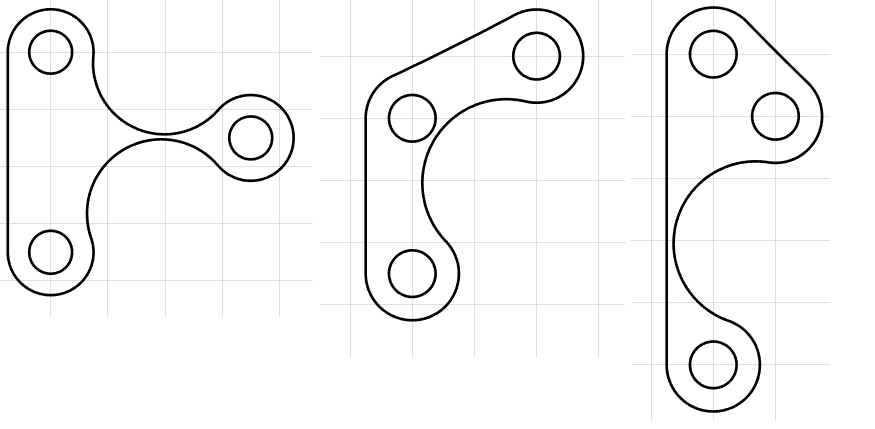

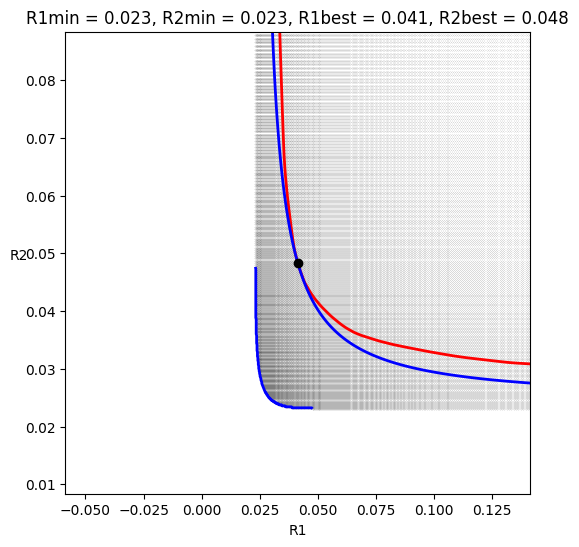

In [ ]:
#grid-pisteet ja tasa-arvokäyrät stress=stress_max (pun) ja  ala = alamin (sin)
AA=A.reshape((N1,N2))
YY=stress_pred.reshape((N1,N2))
plt.figure(figsize=(6,6))
#grid-pisteet
plt.plot(R11[AA<10],R22[AA<10],'k.',markersize=0.1) #kelvot geometriat
#tasa-arvokäyrät
plt.contour(R11,R22,YY,[stress_max],colors=['r'],linewidths=2)
plt.contour(R11,R22,AA,[alamin],colors=['b'],linewidths=2)
plt.plot(R1best,R2best,'ko')
plt.xlabel('R1')
plt.ylabel('R2',rotation=0)
a1=0.1
plt.xlim([R1best-a1,R1best+a1])
a2=0.04
plt.ylim([R2best-a2,R2best+a2])
plt.title('R1min = {:.3f}'.format(R1min)+', R2min = {:.3f}'.format(R2min)
          +', R1best = {:.3f}'.format(R1best)+', R2best = {:.3f}'.format(R2best))
plt.show()
